In [144]:
from IPython.display import display, Image


In [177]:
import pyBigWig

bw_path = '/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/11_merged_bam2bw/DM_merged.bw'  # Replace with your BigWig file path

# Open the BigWig file
bw = pyBigWig.open(bw_path)

# # Example: Print the chromosome names and lengths
# for chrom in bw.chroms().items():
#     print(chrom)

values = bw.values('1', 10000000, 21000000)
# print(values)

# Close the BigWig file
bw.close()
max(values)

1943.469970703125

In [148]:
values[1:100]

[202.35299682617188,
 202.35299682617188,
 202.35299682617188,
 202.35299682617188,
 202.35299682617188,
 202.35299682617188,
 202.35299682617188,
 202.35299682617188,
 202.35299682617188,
 182.7530059814453,
 182.7530059814453,
 182.7530059814453,
 182.7530059814453,
 182.7530059814453,
 182.7530059814453,
 182.7530059814453,
 182.7530059814453,
 182.7530059814453,
 182.7530059814453,
 180.26800537109375,
 180.26800537109375,
 180.26800537109375,
 180.26800537109375,
 180.26800537109375,
 180.26800537109375,
 180.26800537109375,
 180.26800537109375,
 180.26800537109375,
 180.26800537109375,
 202.90499877929688,
 202.90499877929688,
 202.90499877929688,
 202.90499877929688,
 202.90499877929688,
 202.90499877929688,
 202.90499877929688,
 202.90499877929688,
 202.90499877929688,
 202.90499877929688,
 193.7949981689453,
 193.7949981689453,
 193.7949981689453,
 193.7949981689453,
 193.7949981689453,
 193.7949981689453,
 193.7949981689453,
 193.7949981689453,
 193.7949981689453,
 193.794998

In [150]:
import pyBigWig

def transform_bigwig(original_bw_path, new_bw_path, transform_func):
    """
    Apply a transformation to the values in a BigWig file and save to a new file.

    :param original_bw_path: Path to the original BigWig file.
    :param new_bw_path: Path for the new BigWig file.
    :param transform_func: Function to apply to each value.
    """
    # Open the original BigWig file
    with pyBigWig.open(original_bw_path) as bw:
        # Create a new BigWig file
        with pyBigWig.open(new_bw_path, 'w') as new_bw:
            # Add chromosome sizes (necessary for a new BigWig file)
            new_bw.addHeader(list(bw.chroms().items()))

            # Process each chromosome
            for chrom, length in bw.chroms().items():
                # Read the values in chunks to avoid memory issues
                chunk_size = 100000  # Adjust chunk size based on your memory capacity
                for start in range(0, length, chunk_size):
                    end = min(start + chunk_size, length)
                    values = bw.values(chrom, start, end)
                    
                    # Apply the transformation
                    transformed_values = [transform_func(v) if v is not None else 0 for v in values]

                    # Write the transformed values to the new BigWig file
                    new_bw.addEntries([chrom] * len(transformed_values), list(range(start, end)), ends=list(range(start + 1, end + 1)), values=transformed_values)

    print("Transformation complete and new BigWig file created.")

# Define the transformation function
def square_divide_by_10(value):
    # return (value ** 1.2) / 10
    return (value** 1.4) / 20

# Example usage
original_bw = '/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/11_merged_bam2bw/DM_merged.bw'
new_bw = '/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/11_merged_bam2bw/DM_merged_power.bw'
transform_bigwig(original_bw, new_bw, square_divide_by_10)

# For another file
original_bw_c12 = '/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/11_merged_bam2bw/C12_merged.bw'
new_bw_c12 = '/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/11_merged_bam2bw/C12_merged_power.bw'
transform_bigwig(original_bw_c12, new_bw_c12, square_divide_by_10)


Transformation complete and new BigWig file created.
Transformation complete and new BigWig file created.


In [258]:
# Example usage
original_bw = '/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/11_merged_bam2bw_BPM_bin30/DM_merged.bw'
new_bw = '/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/11_merged_bam2bw_BPM_bin30/DM_merged_power.bw'
transform_bigwig(original_bw, new_bw, square_divide_by_10)

Transformation complete and new BigWig file created.


In [259]:
# Example usage
original_bw = '/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/11_merged_bam2bw_BPM_bin30/C12_merged.bw'
new_bw = '/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/11_merged_bam2bw_BPM_bin30/C12_merged_power.bw'
transform_bigwig(original_bw, new_bw, square_divide_by_10)

Transformation complete and new BigWig file created.


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 5. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 6. [spacer]
INFO:pygenometracks.tracksClass:initialize 7. [test gtf collapsed]
100%|█████████████████████████████████████████| 67/67 [00:00<00:00, 3301.63it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5246627330780029
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 22.02127659574468. Dpi is set to 72

I

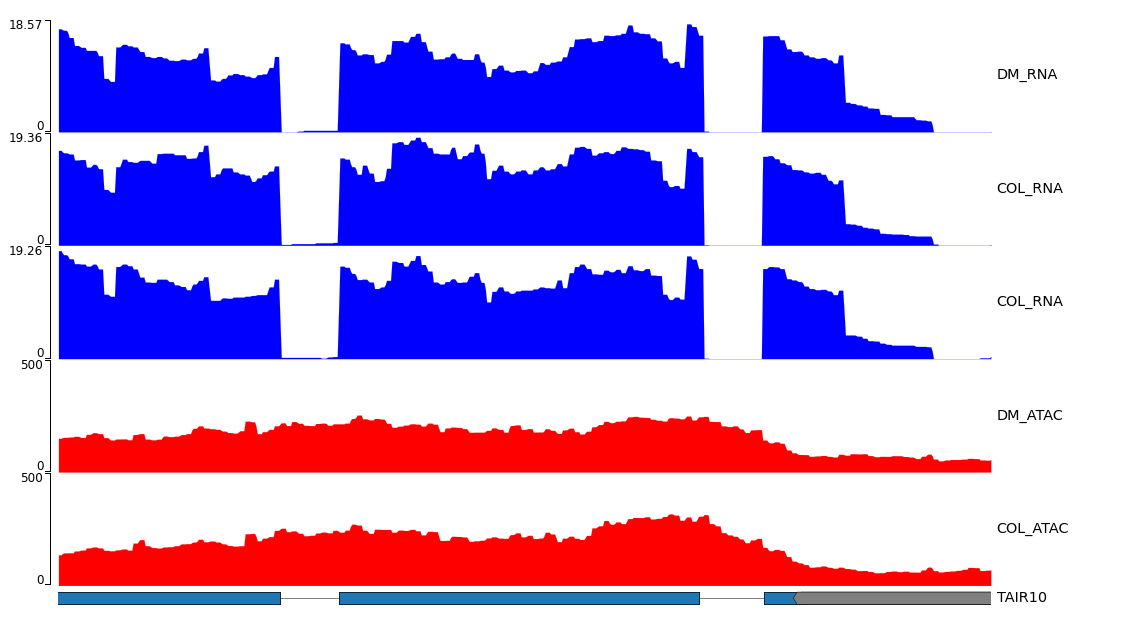

In [151]:
! pyGenomeTracks --tracks ./pyGenomeTracks_plots/bigwig_track.ini --region 2:15779973-15781561\
    -o pyGenomeTracks_plots/act1.png
img_path = 'pyGenomeTracks_plots/act1.png'  # Replace with your file path
display(Image(filename=img_path))


# parse GTF

In [ ]:
import pandas as pd

def parse_attributes(attributes_str):
    """Parse the attributes column of a GTF file and return a dictionary."""
    attributes = {}
    for attribute in attributes_str.split(';'):
        attribute = attribute.strip()
        if attribute:
            parts = attribute.split(' ')
            key = parts[0]
            value = ' '.join(parts[1:]).strip('"')
            attributes[key] = value
    return attributes

gtf_file = '/media/HDD2/Genomes/Ath_Ensembl56/Arabidopsis_thaliana.TAIR10.56.gtf'
df = pd.read_csv(gtf_file, sep='\t', comment='#', header=None, 
                 names=['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'])

# Keep only rows where feature is 'gene'
df = df[df['feature'] == 'gene']

# Apply the parse_attributes function to the 'attribute' column
df['attributes'] = df['attribute'].apply(parse_attributes)

# Extract gene_id, gene_name, strand, and chromosome
df['gene_id'] = df['attributes'].apply(lambda x: x.get('gene_id'))
df['gene_name'] = df['attributes'].apply(lambda x: x.get('gene_name'))
df['strand'] = df['strand']
df['chromosome'] = df['seqname']

# Filter for rows with gene_id and gene_name
filtered_df = df.dropna(subset=['gene_id', 'gene_name'])

# Select relevant columns
result_df = filtered_df[['chromosome', 'gene_id', 'gene_name', 'start', 'end', 'strand']]

print(result_df)


In [191]:
import pandas as pd

# Assuming result_df is your DataFrame

def locater(df, gene_id, upstream=2000, downstream=500):
    """
    Locate regions around a gene based on its strand.
    For '+' strand, it returns (start - upstream) to (end + downstream).
    For '-' strand, it returns (end + upstream) to (start - downstream).
    """
    gene_row = df[df['gene_id'] == gene_id]

    if not gene_row.empty:
        row = gene_row.iloc[0]
        if row['strand'] == '+':
            start = max(1, row['start'] - upstream)  # Ensure start is not less than 1
            end = row['end'] + downstream
        else:  # strand is '-'
            start = max(1, row['start'] - downstream)  # Ensure start is not less than 1
            end = row['end'] + upstream
        return f"{row['chromosome']}:{start}-{end}"
    else:
        return f"Gene {gene_id} not found in the DataFrame."

# Example usage
gene_of_interest = 'AT1G29720'
region = locater(result_df, gene_of_interest)
print(f"Region for {gene_of_interest}: {region}")


Region for AT1G29720: 1:10393159-10401873


In [411]:
#filter the dataframe get row for gene id AT1G29720
result_df[result_df['gene_id'] == 'AT1G29720']

,chromosome,gene_id,gene_name,start,end,strand
167848,1,AT1G29720,AT1G29720,10393659,10399873,-


In [242]:
! mkdir ./ini_files

In [387]:
import subprocess
from IPython.display import Image, display
import os
import pyBigWig
import configparser
import re

def get_max(bigwig_path, region):
    with pyBigWig.open(bigwig_path) as bw:
        chrom, start_end = region.split(':')
        start, end = map(int, start_end.split('-'))
        max_val = bw.stats(chrom, start, end, type='max')[0]
        return max_val if max_val is not None else 0

def update_ini_with_max(ini_path, region, output_ini_path):
    config = configparser.ConfigParser()
    config.optionxform = str  # Preserve case sensitivity
    config.read(ini_path)

    # Group the sections by type (RNA, ATAC, etc.), excluding numerical suffix
    groups = {}
    for section in config.sections():
        if section.startswith('bigwig '):
            group_type = re.match(r'bigwig (\w+)', section).group(1)
            group_type = ''.join([i for i in group_type if not i.isdigit()])  # Remove digits
            groups.setdefault(group_type, []).append(section)

    # Calculate max values for each group
    max_values = {}
    for group, sections in groups.items():
        max_val = 0
        for section in sections:
            file_path = config[section].get('file')
            max_val = max(max_val, get_max(file_path, region), 0.6)
        max_values[group] = max_val * 1.1  # Add 10% padding

    # Update the sections with the calculated max values
    for group, sections in groups.items():
        for section in sections:
            config[section]['max_value'] = str(max_values[group])

    with open(output_ini_path, 'w') as configfile:
        config.write(configfile)

# def plot_gene_track(df, gene_id, track_ini, upstream=2000, downstream=500, output_dir='pyGenomeTracks_plots', render_plot=True):
#     """
#     Generate a plot for a specified gene using pyGenomeTracks.
#     Optionally display the plot or just save it.
    
#     :param df: DataFrame containing gene information.
#     :param gene_id: The ID of the gene to plot.
#     :param track_ini: Path to the INI file for pyGenomeTracks.
#     :param upstream: Length upstream of the gene start to include in the plot.
#     :param downstream: Length downstream of the gene end to include in the plot.
#     :param output_dir: Directory to save the output plot.
#     :param render_plot: If True, display the plot. If False, only save the plot.
#     """
#     # Find the region for the gene
#     region = locater(df, gene_id, upstream, downstream)
#     if "not found" in region:
#         print(region)
#         return

#     # Extract gene name for the file name
#     gene_name = df[df['gene_id'] == gene_id]['gene_name'].iloc[0]

#     # Update the INI file with max values for the region
#     updated_ini_path = f'./pyGenomeTracks_plots/bigwig_track_{gene_id}.ini'
#     update_ini_with_max(track_ini, region, updated_ini_path)

#     # Prepare the output file path
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
#     output_file = os.path.join(output_dir, f"{gene_id}_{gene_name}.png")

#     # Construct the pyGenomeTracks command
#     cmd = [
#         "pyGenomeTracks",
#         "--tracks", updated_ini_path,
#         "--region", region,
#         "-o", output_file
#     ]

#     # Run the command
#     try:
#         subprocess.run(cmd, check=True)
#         print(f"Plot generated: {output_file}")
#         if render_plot:
#             display(Image(filename=output_file))
#     except subprocess.CalledProcessError as e:
#         print(f"An error occurred: {e}")

# # Example usage
# # Replace 'result_df' with your DataFrame containing gene information
# # Replace 'AT4G16890' with the gene ID of interest
# plot_gene_track(result_df, 'AT4G33300', './pyGenomeTracks_plots/bigwig_track2.ini', 5000, 1500)


In [425]:
import subprocess
from IPython.display import Image, display, FileLink
import os
import pyBigWig
import configparser
import re

def plot_gene_track(df, gene_id, track_ini, upstream=2000, downstream=500, output_dir='pyGenomeTracks_plots', render_plot=True, file_format='png'):
    """
    Generate a plot for a specified gene using pyGenomeTracks.
    Optionally display the plot or just save it.
    
    :param df: DataFrame containing gene information.
    :param gene_id: The ID of the gene to plot.
    :param track_ini: Path to the INI file for pyGenomeTracks.
    :param upstream: Length upstream of the gene start to include in the plot.
    :param downstream: Length downstream of the gene end to include in the plot.
    :param output_dir: Directory to save the output plot.
    :param render_plot: If True, display the plot. If False, only save the plot.
    :param file_format: Format of the output file ('png' or 'pdf').
    """
    # Find the region for the gene
    region = locater(df, gene_id, upstream, downstream)
    if "not found" in region:
        print(region)
        return

    # Extract gene name for the file name
    gene_name = df[df['gene_id'] == gene_id]['gene_name'].iloc[0]

    # Create directory for ini files if it doesn't exist
    ini_files_dir = os.path.join('./pyGenomeTracks_plots', 'ini_files')
    if not os.path.exists(ini_files_dir):
        os.makedirs(ini_files_dir)

    # Update the INI file with max values for the region
    updated_ini_path = os.path.join(ini_files_dir, f'bigwig_track_{gene_id}.ini')
    update_ini_with_max(track_ini, region, updated_ini_path)

    # Prepare the output file path
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_file = os.path.join(output_dir, f"{gene_id}_{gene_name}.{file_format}")

    # Construct the pyGenomeTracks command
    cmd = [
        "pyGenomeTracks",
        "--tracks", updated_ini_path,
        "--region", region,
        "-o", output_file,
        '--trackLabelHAlign', 'left',
        '--width' , '8.5',
        '--height' , '3',
        '--fontSize' , '4',
    ]

    # Run the command
    try:
        subprocess.run(cmd, check=True)
        print(f"Plot generated: {output_file}")
        if render_plot:
            if file_format == 'png':
                display(Image(filename=output_file))
            elif file_format == 'pdf':
                display(FileLink(output_file))
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")

# Example usage
plot_gene_track(result_df, 'AT4G33300', './pyGenomeTracks_plots/bigwig_track2.ini', 3000, 1500, render_plot=True, file_format='pdf')

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 2977.85it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5188560485839844
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.5 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: pyGenomeTracks_plots/AT4G33300_ADR1-L1.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/AT4G33300_ADR1-L1.pdf

In [408]:
plot_gene_track(result_df, 'AT4G33300', './pyGenomeTracks_plots/bigwig_track2.ini', 5000, 1500, render_plot=False)

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 2997.17it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5659604072570801
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: pyGenomeTracks_plots/AT4G33300_ADR1-L1.png


In [321]:
import pyreadr

result = pyreadr.read_r('../Pathogen_JC14_3DM/Rdata/Res_NLRs_in_connectivity_table.rds')

In [322]:
import pyreadr

LRRs = pyreadr.read_r('../Pathogen_JC14_3DM/Rdata/Res_LRRs_color.rds')
LRRs = LRRs[None]
LRRs

,AGI,log2FC,source,Symbol,label_color_markdown,connectivity_rowSums_adj,module,gene_name.y,DM6.DM7,DM1.DM2d,...,AvrRps4.6h,AvrRps4.12h,AvrRps4.20h,DM1.DM2d_adr1s,Col.0_adr1s,DM6.DM7_adr1s,Class,category,plot_label,label_color
0,AT1G80080,-2.481490,DM6/DM7,TMM,<i style='color: #984ea3'>TMM_AT1G80080</i>,1270.015511,MEblue,TMM,-2.481490,-4.265392,...,-0.081361,0.074342,-0.251108,-1.778893,-0.941717,-0.609778,LRR-RLPs,DM6/DM7,TMM_AT1G80080,#984ea3
1,AT1G12460,-1.820490,DM6/DM7,AT1G12460,<i style='color: #386cb0'>AT1G12460</i>,1736.469857,MEblue,AT1G12460,-1.820490,-3.619635,...,-0.059407,-0.381257,-1.145846,-0.666801,0.930063,0.077057,LRR-RLKs,DM6/DM7,AT1G12460,#386cb0
2,AT1G55610,2.488222,DM6/DM7,BRL1,<i style='color: #386cb0'>BRL1_AT1G55610</i>,1514.452364,MEcyan,BRL1,2.488222,5.013700,...,-0.349835,-0.638562,1.831876,0.885307,-1.972105,0.960870,LRR-RLKs,DM6/DM7,BRL1_AT1G55610,#386cb0
3,AT1G74360,2.517064,DM6/DM7,NILR1,<i style='color: #386cb0'>NILR1_AT1G74360</i>,1920.082184,MEcyan,NILR1,2.517064,4.299102,...,0.426404,0.579721,2.755715,1.657961,-1.024775,2.266635,LRR-RLKs,DM6/DM7,NILR1_AT1G74360,#386cb0
4,AT1G51805,-1.430332,DM6/DM7,SIF3,<i style='color: #386cb0'>SIF3_AT1G51805</i>,1236.862624,MEblue,SIF3,-1.430332,-3.429326,...,-0.549796,-0.557871,-1.755396,-0.637676,0.686050,-0.417458,LRR-RLKs,DM6/DM7,SIF3_AT1G51805,#386cb0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,AT1G51790,-2.976541,Col-0_adr1s,AT1G51790,<i style='color: #386cb0'>AT1G51790</i>,1751.834834,MEcyan,AT1G51790,4.120423,2.806600,...,1.267788,2.653587,2.179745,1.365280,-2.976541,1.759159,LRR-RLKs,Col-0,AT1G51790,#386cb0
546,AT1G58190,-3.738923,Col-0_adr1s,RLP9,<i style='color: #984ea3'>RLP9_AT1G58190</i>,1595.661779,MEcyan,RLP9,4.294404,3.474514,...,-0.028701,0.908024,2.125412,1.414309,-3.738923,1.613260,LRR-RLPs,Col-0,RLP9_AT1G58190,#984ea3
547,AT5G62710,-5.518170,DM1/DM2d_adr1s,AT5G62710,<i style='color: #386cb0'>AT5G62710</i>,1602.185410,MEblue,AT5G62710,-1.508787,-8.252634,...,-0.182420,-0.351665,-1.422403,-5.518170,0.627014,0.362278,LRR-RLKs,DM1/DM2d,AT5G62710,#386cb0
548,AT1G53440,-6.829161,DM1/DM2d_adr1s,AT1G53440,<i style='color: #386cb0'>AT1G53440</i>,1113.173478,MEcyan,AT1G53440,0.195113,-1.904766,...,0.403842,0.780538,1.050826,-6.829161,-2.008661,0.650775,LRR-RLKs,DM1/DM2d,AT1G53440,#386cb0


In [323]:
NLRs = result[None]
NLRs

,AGI,connectivity_rowSums_adj,module,gene_name,DM6.DM7,DM1.DM2d,DM10.DM11,AvrRpt2.6h,AvrRpt2.12h,AvrRpt2.20h,...,Organization.x,log2FC,source,Class,Symbol.y,Organization.y,plot_label,label_color,label_color_markdown,category
0,AT1G72900,1892.695061,MEcyan,TN7,2.131740,2.581504,5.941569,0.809169,1.799455,3.103697,...,clustered,3.103697,AvrRpt2-20h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRpt2
1,AT1G72900,1892.695061,MEcyan,TN7,2.131740,2.581504,5.941569,0.809169,1.799455,3.103697,...,clustered,2.812234,AvrRps4-20h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRps4
2,AT1G72900,1892.695061,MEcyan,TN7,2.131740,2.581504,5.941569,0.809169,1.799455,3.103697,...,clustered,2.581504,DM1/DM2d vs Col-0,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,DM1/DM2d
3,AT1G72900,1892.695061,MEcyan,TN7,2.131740,2.581504,5.941569,0.809169,1.799455,3.103697,...,clustered,2.131740,DM6/DM7 vs Col-0,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,DM6/DM7
4,AT1G72900,1892.695061,MEcyan,TN7,2.131740,2.581504,5.941569,0.809169,1.799455,3.103697,...,clustered,2.099646,DM1/DM2d_adr1s vs Col-0,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,DM1/DM2d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,AT4G16890,43.128337,MEsalmon,SNC1,0.576846,1.506615,2.174640,-0.008341,0.105525,0.739954,...,clustered,0.194556,DM1/DM2d_adr1s vs Col-0,TIR-NBS-LRR,SNC1,clustered,SNC1_AT4G16890,#386cb0,<i style='color: #386cb0'>SNC1_AT4G16890</i>,DM1/DM2d
502,AT4G16890,43.128337,MEsalmon,SNC1,0.576846,1.506615,2.174640,-0.008341,0.105525,0.739954,...,clustered,0.105525,AvrRpt2-12h,TIR-NBS-LRR,SNC1,clustered,SNC1_AT4G16890,#386cb0,<i style='color: #386cb0'>SNC1_AT4G16890</i>,AvrRpt2
503,AT4G16890,43.128337,MEsalmon,SNC1,0.576846,1.506615,2.174640,-0.008341,0.105525,0.739954,...,clustered,-0.008341,AvrRpt2-6h,TIR-NBS-LRR,SNC1,clustered,SNC1_AT4G16890,#386cb0,<i style='color: #386cb0'>SNC1_AT4G16890</i>,AvrRpt2
504,AT4G16890,43.128337,MEsalmon,SNC1,0.576846,1.506615,2.174640,-0.008341,0.105525,0.739954,...,clustered,-0.012739,AvrRps4-6h,TIR-NBS-LRR,SNC1,clustered,SNC1_AT4G16890,#386cb0,<i style='color: #386cb0'>SNC1_AT4G16890</i>,AvrRps4


In [324]:
import os

# Assuming plot_gene_track and other necessary functions are already defined

# Iterate over the DataFrame
for index, row in NLRs[['AGI', 'module']].drop_duplicates().iterrows():
    gene_id = row['AGI']
    module_name = row['module']

    # Create a directory for the module if it doesn't exist
    module_dir = os.path.join('./pyGenomeTracks_plots/NLRs', module_name)
    if not os.path.exists(module_dir):
        os.makedirs(module_dir)

    # Set the output directory for the plot
    output_dir = module_dir

    # Call the plot_gene_track function for each gene
    plot_gene_track(result_df, gene_id, './pyGenomeTracks_plots/bigwig_track2.ini', 5000, 1000, output_dir=output_dir, render_plot=False)

    print(f"Plot for {gene_id} saved in {module_dir}")


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 83/83 [00:00<00:00, 3628.56it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5207774639129639
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G72900_AT1G72900.pdf
Plot for AT1G72900 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 56/56 [00:00<00:00, 4671.83it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.42848634719848633
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT4G11170_AT4G11170.pdf
Plot for AT4G11170 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 82/82 [00:00<00:00, 3637.00it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5155379772186279
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G72940_AT1G72940.pdf
Plot for AT1G72940 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 138/138 [00:00<00:00, 5854.83it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5088253021240234
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G57630_AT1G57630.pdf
Plot for AT1G57630 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3574.64it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4866061210632324
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT4G14370_AT4G14370.pdf
Plot for AT4G14370 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 3755.30it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.45791006088256836
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT5G04720_ADR1-L2.pdf
Plot for AT5G04720 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3035.26it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5345439910888672
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT4G33300_ADR1-L1.pdf
Plot for AT4G33300 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 3485.62it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4702470302581787
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT4G19520_AT4G19520.pdf
Plot for AT4G19520 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 55/55 [00:00<00:00, 4373.79it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4330630302429199
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G66090_AT1G66090.pdf
Plot for AT1G66090 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 4575.74it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4549894332885742
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT5G41750_AT5G41750.pdf
Plot for AT5G41750 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 2647.67it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.566237211227417
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT2G32140_AT2G32140.pdf
Plot for AT2G32140 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 55/55 [00:00<00:00, 3301.66it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.45911145210266113
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G31540_AT1G31540.pdf
Plot for AT1G31540 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 82/82 [00:00<00:00, 3699.24it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5294671058654785
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G72920_AT1G72920.pdf
Plot for AT1G72920 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 136/136 [00:00<00:00, 5814.50it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.505603551864624
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G57650_AT1G57650.pdf
Plot for AT1G57650 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 53/53 [00:00<00:00, 2395.40it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5072667598724365
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT2G20142_AT2G20142.pdf
Plot for AT2G20142 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3454.23it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4765448570251465
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G51270_AT1G51270.pdf
Plot for AT1G51270 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 4649.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.45296740531921387
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT5G41740_AT5G41740.pdf
Plot for AT5G41740 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3539.03it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5050055980682373
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT3G04220_AT3G04220.pdf
Plot for AT3G04220 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 3423.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4802711009979248
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G33560_ADR1.pdf
Plot for AT1G33560 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3471.86it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.50345778465271
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
I

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT3G04210_AT3G04210.pdf
Plot for AT3G04210 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 48/48 [00:00<00:00, 3518.40it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.44925570487976074
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT5G45000_AT5G45000.pdf
Plot for AT5G45000 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 43/43 [00:00<00:00, 3320.66it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4353306293487549
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT3G44400_AT3G44400.pdf
Plot for AT3G44400 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 3695.42it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4671955108642578
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT3G25510_AT3G25510.pdf
Plot for AT3G25510 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 80/80 [00:00<00:00, 4522.10it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4678952693939209
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT3G50950_ZAR1.pdf
Plot for AT3G50950 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 48/48 [00:00<00:00, 3274.03it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4360799789428711
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT5G45090_PP2-A7.pdf
Plot for AT5G45090 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 3722.45it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4741489887237549
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT5G46520_AT5G46520.pdf
Plot for AT5G46520 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 80/80 [00:00<00:00, 3303.41it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5317332744598389
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT5G58120_AT5G58120.pdf
Plot for AT5G58120 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3232.08it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5122113227844238
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G63350_AT1G63350.pdf
Plot for AT1G63350 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 50/50 [00:00<00:00, 4104.02it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4333174228668213
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT5G44910_AT5G44910.pdf
Plot for AT5G44910 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 82/82 [00:00<00:00, 3620.54it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.521371603012085
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G72910_AT1G72910.pdf
Plot for AT1G72910 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2450.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5547242164611816
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G63750_AT1G63750.pdf
Plot for AT1G63750 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 82/82 [00:00<00:00, 4707.41it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4543616771697998
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEcyan/AT1G56520_AT1G56520.pdf
Plot for AT1G56520 saved in ./pyGenomeTracks_plots/NLRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 3563.76it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4626288414001465
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEblue/AT4G19530_AT4G19530.pdf
Plot for AT4G19530 saved in ./pyGenomeTracks_plots/NLRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 2700.17it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.555504322052002
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/NLRs/MEpurple/AT1G61300_AT1G61300.pdf
Plot for AT1G61300 saved in ./pyGenomeTracks_plots/NLRs/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 4907.20it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.43178606033325195
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/NLRs/MEpurple/AT1G62630_AT1G62630.pdf
Plot for AT1G62630 saved in ./pyGenomeTracks_plots/NLRs/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 87/87 [00:00<00:00, 3880.76it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5304069519042969
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEgreenyellow/AT1G15890_AT1G15890.pdf
Plot for AT1G15890 saved in ./pyGenomeTracks_plots/NLRs/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 50/50 [00:00<00:00, 3404.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4535212516784668
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEdarkgreen/AT1G59620_CW9.pdf
Plot for AT1G59620 saved in ./pyGenomeTracks_plots/NLRs/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 3734.31it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4748971462249756
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEgreenyellow/AT1G65390_PP2-A5.pdf
Plot for AT1G65390 saved in ./pyGenomeTracks_plots/NLRs/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 45/45 [00:00<00:00, 3255.89it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.43932032585144043
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/NLRs/MEsalmon/AT3G44670_AT3G44670.pdf
Plot for AT3G44670 saved in ./pyGenomeTracks_plots/NLRs/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 3602.85it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.47841882705688477
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/NLRs/MEsalmon/AT5G46490_AT5G46490.pdf
Plot for AT5G46490 saved in ./pyGenomeTracks_plots/NLRs/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 39/39 [00:00<00:00, 3140.53it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.44396162033081055
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/NLRs/MEsalmon/AT3G44630_AT3G44630.pdf
Plot for AT3G44630 saved in ./pyGenomeTracks_plots/NLRs/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 42/42 [00:00<00:00, 3077.10it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4432089328765869
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEsalmon/AT3G44480_RPP1.pdf
Plot for AT3G44480 saved in ./pyGenomeTracks_plots/NLRs/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 40/40 [00:00<00:00, 5623.33it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.3767514228820801
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEsalmon/AT4G09420_AT4G09420.pdf
Plot for AT4G09420 saved in ./pyGenomeTracks_plots/NLRs/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 82/82 [00:00<00:00, 3578.94it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5130472183227539
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEmidnightblue/AT1G72930_TIR.pdf
Plot for AT1G72930 saved in ./pyGenomeTracks_plots/NLRs/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 3857.63it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4700796604156494
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEsalmon/AT5G46510_AT5G46510.pdf
Plot for AT5G46510 saved in ./pyGenomeTracks_plots/NLRs/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2804.62it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5210378170013428
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/NLRs/MEsalmon/AT4G16890_SNC1.pdf
Plot for AT4G16890 saved in ./pyGenomeTracks_plots/NLRs/MEsalmon


In [325]:

# Iterate over the DataFrame
for index, row in LRRs[['AGI', 'module']].drop_duplicates().sort_values(by=['module']).iterrows():
    gene_id = row['AGI']
    module_name = row['module']

    # Create a directory for the module if it doesn't exist
    module_dir = os.path.join('./pyGenomeTracks_plots/LRRs/', module_name)
    if not os.path.exists(module_dir):
        os.makedirs(module_dir)

    # Set the output directory for the plot
    output_dir = module_dir

    # Call the plot_gene_track function for each gene
    plot_gene_track(result_df, gene_id, './pyGenomeTracks_plots/bigwig_track2.ini', 5000, 1000, output_dir=output_dir, render_plot=False)

    print(f"Plot for {gene_id} saved in {module_dir}")


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 2546.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5973694324493408
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G80080_TMM.pdf
Plot for AT1G80080 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3847.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48227953910827637
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT5G62710_AT5G62710.pdf
Plot for AT5G62710 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3632.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4983401298522949
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT5G07180_ERL2.pdf
Plot for AT5G07180 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 4352.63it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4763498306274414
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT3G57830_AT3G57830.pdf
Plot for AT3G57830 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 3249.39it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.47173333168029785
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT3G46370_AT3G46370.pdf
Plot for AT3G46370 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 3717.42it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5022196769714355
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT3G56370_AT3G56370.pdf
Plot for AT3G56370 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3792.26it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4718904495239258
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT3G51740_IMK2.pdf
Plot for AT3G51740 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 4103.27it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48093342781066895
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT5G16000_NIK1.pdf
Plot for AT5G16000 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3917.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48514485359191895
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT3G03770_AT3G03770.pdf
Plot for AT3G03770 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 2902.74it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5179986953735352
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT2G26330_ER.pdf
Plot for AT2G26330 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 3506.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.46828174591064453
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT2G41820_AT2G41820.pdf
Plot for AT2G41820 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 4335.26it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.46053552627563477
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT2G02780_AT2G02780.pdf
Plot for AT2G02780 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 3316.88it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.475771427154541
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT2G36570_AT2G36570.pdf
Plot for AT2G36570 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3579.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4598095417022705
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT4G20940_GHR1.pdf
Plot for AT4G20940 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 4046.58it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.46132516860961914
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT4G23740_AT4G23740.pdf
Plot for AT4G23740 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3543.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.49448680877685547
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT3G49670_BAM2.pdf
Plot for AT3G49670 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 5040.50it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.43837952613830566
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT5G43020_AT5G43020.pdf
Plot for AT5G43020 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3607.18it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.473616361618042
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT5G51560_AT5G51560.pdf
Plot for AT5G51560 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 76/76 [00:00<00:00, 3395.29it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5247104167938232
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT4G34220_AT4G34220.pdf
Plot for AT4G34220 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 4093.05it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.46706724166870117
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G12460_AT1G12460.pdf
Plot for AT1G12460 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 81/81 [00:00<00:00, 3671.78it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5087275505065918
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G29720_AT1G29720.pdf
Plot for AT1G29720 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3464.63it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4851264953613281
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G49730_AT1G49730.pdf
Plot for AT1G49730 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 2839.46it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48107314109802246
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G51805_AT1G51805.pdf
Plot for AT1G51805 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 3520.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5156817436218262
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G60800_NIK3.pdf
Plot for AT1G60800 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2852.46it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5296897888183594
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G10850_AT1G10850.pdf
Plot for AT1G10850 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 2730.97it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5223710536956787
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G11130_SUB.pdf
Plot for AT1G11130 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2961.03it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4961893558502197
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G55610_BRL1.pdf
Plot for AT1G55610 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3378.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4732832908630371
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT2G25440_RLP20.pdf
Plot for AT2G25440 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 89/89 [00:00<00:00, 4806.33it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48012804985046387
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G74360_AT1G74360.pdf
Plot for AT1G74360 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 3300.96it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5110845565795898
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT2G32680_RLP23.pdf
Plot for AT2G32680 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 3805.32it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4480593204498291
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT2G19190_FRK1.pdf
Plot for AT2G19190 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 45/45 [00:00<00:00, 3495.38it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.422931432723999
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G34420_AT1G34420.pdf
Plot for AT1G34420 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 3048.57it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4863119125366211
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G51800_IOS1.pdf
Plot for AT1G51800 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 53/53 [00:00<00:00, 3656.88it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4353458881378174
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G47890_RLP7.pdf
Plot for AT1G47890 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 80/80 [00:00<00:00, 4141.50it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.485119104385376
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G53440_AT1G53440.pdf
Plot for AT1G53440 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 47/47 [00:00<00:00, 2956.53it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.46030306816101074
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G51890_AT1G51890.pdf
Plot for AT1G51890 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 2960.93it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48279905319213867
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G51790_AT1G51790.pdf
Plot for AT1G51790 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 3274.46it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.492950439453125
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT3G13380_BRL3.pdf
Plot for AT3G13380 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 4023.83it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48062562942504883
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT3G11080_RLP35.pdf
Plot for AT3G11080 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 4231.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4684267044067383
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT3G47090_AT3G47090.pdf
Plot for AT3G47090 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 4395.55it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4459652900695801
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT5G25910_RLP52.pdf
Plot for AT5G25910 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3952.07it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4616239070892334
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT5G27060_RLP53.pdf
Plot for AT5G27060 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 3881.98it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4698524475097656
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT5G25930_AT5G25930.pdf
Plot for AT5G25930 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 48/48 [00:00<00:00, 2793.45it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5557138919830322
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G51860_AT1G51860.pdf
Plot for AT1G51860 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 3376.36it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4586954116821289
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G58190_RLP9.pdf
Plot for AT1G58190 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 23/23 [00:00<00:00, 4843.79it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.35778307914733887
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G35710_AT1G35710.pdf
Plot for AT1G35710 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 2895.05it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.47721195220947266
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G51850_AT1G51850.pdf
Plot for AT1G51850 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 5310.68it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.41657233238220215
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEmidnightblue/AT3G23110_RLP37.pdf
Plot for AT3G23110 saved in ./pyGenomeTracks_plots/LRRs/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 3943.39it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4783470630645752
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEmidnightblue/AT3G11010_RLP34.pdf
Plot for AT3G11010 saved in ./pyGenomeTracks_plots/LRRs/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 4174.06it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.44085025787353516
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEmidnightblue/AT4G13810_RLP47.pdf
Plot for AT4G13810 saved in ./pyGenomeTracks_plots/LRRs/MEmidnightblue


In [325]:

# Iterate over the DataFrame
for index, row in LRRs[['AGI', 'module']].drop_duplicates().sort_values(by=['module']).iterrows():
    gene_id = row['AGI']
    module_name = row['module']

    # Create a directory for the module if it doesn't exist
    module_dir = os.path.join('./pyGenomeTracks_plots/LRRs_MEblue/', module_name)
    if not os.path.exists(module_dir):
        os.makedirs(module_dir)

    # Set the output directory for the plot
    output_dir = module_dir

    # Call the plot_gene_track function for each gene
    plot_gene_track(result_df, gene_id, './pyGenomeTracks_plots/bigwig_track2.ini', 5000, 1000, output_dir=output_dir, render_plot=False)

    print(f"Plot for {gene_id} saved in {module_dir}")


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 2546.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5973694324493408
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G80080_TMM.pdf
Plot for AT1G80080 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3847.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48227953910827637
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT5G62710_AT5G62710.pdf
Plot for AT5G62710 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3632.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4983401298522949
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT5G07180_ERL2.pdf
Plot for AT5G07180 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 4352.63it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4763498306274414
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT3G57830_AT3G57830.pdf
Plot for AT3G57830 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 3249.39it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.47173333168029785
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT3G46370_AT3G46370.pdf
Plot for AT3G46370 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 3717.42it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5022196769714355
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT3G56370_AT3G56370.pdf
Plot for AT3G56370 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3792.26it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4718904495239258
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT3G51740_IMK2.pdf
Plot for AT3G51740 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 4103.27it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48093342781066895
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT5G16000_NIK1.pdf
Plot for AT5G16000 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3917.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48514485359191895
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT3G03770_AT3G03770.pdf
Plot for AT3G03770 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 2902.74it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5179986953735352
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT2G26330_ER.pdf
Plot for AT2G26330 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 3506.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.46828174591064453
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT2G41820_AT2G41820.pdf
Plot for AT2G41820 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 4335.26it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.46053552627563477
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT2G02780_AT2G02780.pdf
Plot for AT2G02780 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 3316.88it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.475771427154541
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT2G36570_AT2G36570.pdf
Plot for AT2G36570 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3579.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4598095417022705
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT4G20940_GHR1.pdf
Plot for AT4G20940 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 4046.58it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.46132516860961914
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT4G23740_AT4G23740.pdf
Plot for AT4G23740 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3543.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.49448680877685547
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT3G49670_BAM2.pdf
Plot for AT3G49670 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 5040.50it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.43837952613830566
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT5G43020_AT5G43020.pdf
Plot for AT5G43020 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3607.18it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.473616361618042
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT5G51560_AT5G51560.pdf
Plot for AT5G51560 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 76/76 [00:00<00:00, 3395.29it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5247104167938232
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT4G34220_AT4G34220.pdf
Plot for AT4G34220 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 4093.05it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.46706724166870117
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G12460_AT1G12460.pdf
Plot for AT1G12460 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 81/81 [00:00<00:00, 3671.78it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5087275505065918
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G29720_AT1G29720.pdf
Plot for AT1G29720 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3464.63it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4851264953613281
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G49730_AT1G49730.pdf
Plot for AT1G49730 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 2839.46it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48107314109802246
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G51805_AT1G51805.pdf
Plot for AT1G51805 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 3520.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5156817436218262
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G60800_NIK3.pdf
Plot for AT1G60800 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2852.46it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5296897888183594
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G10850_AT1G10850.pdf
Plot for AT1G10850 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 2730.97it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5223710536956787
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEblue/AT1G11130_SUB.pdf
Plot for AT1G11130 saved in ./pyGenomeTracks_plots/LRRs/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2961.03it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4961893558502197
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G55610_BRL1.pdf
Plot for AT1G55610 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3378.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4732832908630371
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT2G25440_RLP20.pdf
Plot for AT2G25440 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 89/89 [00:00<00:00, 4806.33it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48012804985046387
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G74360_AT1G74360.pdf
Plot for AT1G74360 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 3300.96it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5110845565795898
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT2G32680_RLP23.pdf
Plot for AT2G32680 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 3805.32it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4480593204498291
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT2G19190_FRK1.pdf
Plot for AT2G19190 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 45/45 [00:00<00:00, 3495.38it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.422931432723999
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G34420_AT1G34420.pdf
Plot for AT1G34420 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 3048.57it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4863119125366211
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G51800_IOS1.pdf
Plot for AT1G51800 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 53/53 [00:00<00:00, 3656.88it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4353458881378174
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G47890_RLP7.pdf
Plot for AT1G47890 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 80/80 [00:00<00:00, 4141.50it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.485119104385376
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G53440_AT1G53440.pdf
Plot for AT1G53440 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 47/47 [00:00<00:00, 2956.53it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.46030306816101074
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G51890_AT1G51890.pdf
Plot for AT1G51890 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 2960.93it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48279905319213867
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G51790_AT1G51790.pdf
Plot for AT1G51790 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 3274.46it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.492950439453125
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT3G13380_BRL3.pdf
Plot for AT3G13380 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 4023.83it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48062562942504883
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT3G11080_RLP35.pdf
Plot for AT3G11080 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 4231.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4684267044067383
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT3G47090_AT3G47090.pdf
Plot for AT3G47090 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 4395.55it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4459652900695801
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT5G25910_RLP52.pdf
Plot for AT5G25910 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3952.07it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4616239070892334
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT5G27060_RLP53.pdf
Plot for AT5G27060 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 3881.98it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4698524475097656
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT5G25930_AT5G25930.pdf
Plot for AT5G25930 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 48/48 [00:00<00:00, 2793.45it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5557138919830322
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G51860_AT1G51860.pdf
Plot for AT1G51860 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 3376.36it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4586954116821289
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G58190_RLP9.pdf
Plot for AT1G58190 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 23/23 [00:00<00:00, 4843.79it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.35778307914733887
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G35710_AT1G35710.pdf
Plot for AT1G35710 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 2895.05it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.47721195220947266
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEcyan/AT1G51850_AT1G51850.pdf
Plot for AT1G51850 saved in ./pyGenomeTracks_plots/LRRs/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 5310.68it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.41657233238220215
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEmidnightblue/AT3G23110_RLP37.pdf
Plot for AT3G23110 saved in ./pyGenomeTracks_plots/LRRs/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 3943.39it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4783470630645752
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs/MEmidnightblue/AT3G11010_RLP34.pdf
Plot for AT3G11010 saved in ./pyGenomeTracks_plots/LRRs/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 4174.06it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.44085025787353516
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs/MEmidnightblue/AT4G13810_RLP47.pdf
Plot for AT4G13810 saved in ./pyGenomeTracks_plots/LRRs/MEmidnightblue


In [345]:
#LRRs_MEblue_DM_down

for gene in [ 'AT1G51805', 'AT1G60800', 'AT2G26330', 'AT2G41820', 
             'AT3G46370', 'AT3G49670']:
    plot_gene_track(result_df, gene, './pyGenomeTracks_plots/bigwig_track2.ini', 5000, 1000, render_plot=True, file_format='pdf', output_dir = './pyGenomeTracks_plots/LRRs_MEblue_DM_down/')


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 2850.29it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.500622034072876
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/LRRs_MEblue_DM_down/AT1G51805_AT1G51805.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/LRRs_MEblue_DM_down/AT1G51805_AT1G51805.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 3709.26it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5147662162780762
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs_MEblue_DM_down/AT1G60800_NIK3.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/LRRs_MEblue_DM_down/AT1G60800_NIK3.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 2919.46it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5012097358703613
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs_MEblue_DM_down/AT2G26330_ER.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/LRRs_MEblue_DM_down/AT2G26330_ER.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 3503.04it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4653491973876953
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]

Plot generated: ./pyGenomeTracks_plots/LRRs_MEblue_DM_down/AT2G41820_AT2G41820.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/LRRs_MEblue_DM_down/AT2G41820_AT2G41820.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 3302.29it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.47595977783203125
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2

Plot generated: ./pyGenomeTracks_plots/LRRs_MEblue_DM_down/AT3G46370_AT3G46370.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/LRRs_MEblue_DM_down/AT3G46370_AT3G46370.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3352.69it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.499744176864624
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 18.29787234042553. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]


Plot generated: ./pyGenomeTracks_plots/LRRs_MEblue_DM_down/AT3G49670_BAM2.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/LRRs_MEblue_DM_down/AT3G49670_BAM2.pdf

In [409]:
#ADR1s

for gene in ['AT5G04720', 'AT1G33560','AT4G33300' ]:
    plot_gene_track(result_df, gene, './pyGenomeTracks_plots/bigwig_track2.ini', 5000, 1000, render_plot=True, file_format='pdf', output_dir = './pyGenomeTracks_plots/ADR1s/')


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 3725.39it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.49529361724853516
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/ADR1s/AT5G04720_ADR1-L2.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/ADR1s/AT5G04720_ADR1-L2.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 3439.27it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5060770511627197
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/ADR1s/AT1G33560_ADR1.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/ADR1s/AT1G33560_ADR1.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 2792.61it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5690417289733887
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/ADR1s/AT4G33300_ADR1-L1.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/ADR1s/AT4G33300_ADR1-L1.pdf

In [399]:
#MEcyan tops showed correaltion

for gene in [ 'AT3G63380','AT4G15610','AT4G23700','AT5G48657','AT1G14870','AT1G22400','AT3G63380'
            ]:
    plot_gene_track(result_df, gene, './pyGenomeTracks_plots/bigwig_track2.ini', 3000, 500, render_plot=True, file_format='pdf', output_dir = './pyGenomeTracks_plots/MEcyan tops showed correaltion/')


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 2268.64it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.7499704360961914
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/MEcyan tops showed correaltion/AT3G63380_AT3G63380.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/MEcyan tops showed correaltion/AT3G63380_AT3G63380.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 1742.09it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.934647798538208
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/MEcyan tops showed correaltion/AT4G15610_AT4G15610.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/MEcyan tops showed correaltion/AT4G15610_AT4G15610.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3323.79it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6091601848602295
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/MEcyan tops showed correaltion/AT4G23700_CHX17.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/MEcyan tops showed correaltion/AT4G23700_CHX17.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2632.16it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.8092217445373535
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/MEcyan tops showed correaltion/AT5G48657_AT5G48657.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/MEcyan tops showed correaltion/AT5G48657_AT5G48657.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 76/76 [00:00<00:00, 1835.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:1.0202319622039795
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/MEcyan tops showed correaltion/AT1G14870_PCR2.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/MEcyan tops showed correaltion/AT1G14870_PCR2.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2909.78it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5732650756835938
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/MEcyan tops showed correaltion/AT1G22400_UGT85A1.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/MEcyan tops showed correaltion/AT1G22400_UGT85A1.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 2179.58it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:1.0140535831451416
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/MEcyan tops showed correaltion/AT3G63380_AT3G63380.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/MEcyan tops showed correaltion/AT3G63380_AT3G63380.pdf

In [401]:
plot_gene_track(result_df, 'AT4G23700', './pyGenomeTracks_plots/bigwig_track2.ini', 2500, 1000, render_plot=True, file_format='pdf', output_dir = './pyGenomeTracks_plots/MEcyan tops showed correaltion/')


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2132.55it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.9386224746704102
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/MEcyan tops showed correaltion/AT4G23700_CHX17.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/MEcyan tops showed correaltion/AT4G23700_CHX17.pdf

In [418]:
plot_gene_track(result_df, 'AT1G33560', './pyGenomeTracks_plots/bigwig_track3.ini', 5000, 1000, render_plot=True, file_format='pdf', output_dir = './pyGenomeTracks_plots/test')


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 3444.23it/s]
INFO:pygenometracks.tracksClass:initialize 7. [x-axis]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.47468066215515137
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenomet

Plot generated: ./pyGenomeTracks_plots/test/AT1G33560_ADR1.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/test/AT1G33560_ADR1.pdf

/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 3889.98it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4585604667663574
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/MEcyan tops showed correaltion/AT1G22400_UGT85A1.png


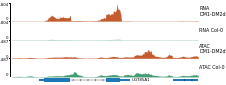

In [419]:
plot_gene_track(result_df, 'AT1G22400', './pyGenomeTracks_plots/bigwig_track2.ini', 2500, 1000, render_plot=True, file_format='png', output_dir = './pyGenomeTracks_plots/MEcyan tops showed correaltion/')


In [426]:
plot_gene_track(result_df, 'AT1G60800', './pyGenomeTracks_plots/bigwig_track2.ini', 5000, 1000, render_plot=True, file_format='pdf', output_dir = './pyGenomeTracks_plots/test/')


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 3648.70it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5129315853118896
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.5 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/test/AT1G60800_NIK3.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/test/AT1G60800_NIK3.pdf

In [427]:
plot_gene_track(result_df, 'AT1G33560', './pyGenomeTracks_plots/bigwig_track2.ini', 5000, 1000, render_plot=True, file_format='pdf', output_dir = './pyGenomeTracks_plots/test/')


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 3328.99it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.47496819496154785
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.5 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/test/AT1G33560_ADR1.pdf


/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/pyGenomeTracks_plots/test/AT1G33560_ADR1.pdf

In [348]:
import pyreadr

connectivity_table_info = pyreadr.read_r('../Pathogen_JC14_3DM/WGCNA_output_all/RDS/connectivity_info.rds')[None]
connectivity_table_info

,gene,connectivity_rowSums_adj,module,gene_name,DM6/DM7,DM1/DM2d,DM10/DM11,AvrRpt2-6h,AvrRpt2-12h,AvrRpt2-20h,AvrRps4-6h,AvrRps4-12h,AvrRps4-20h,DM1/DM2d_adr1s,Col-0_adr1s,DM6/DM7_adr1s
0,AT5G42010,1955.104958,MEcyan,AT5G42010,2.490548,2.528331,5.043978,0.337865,1.403870,2.522713,0.174826,1.125097,1.947681,1.236313,-1.470478,0.471582
1,AT1G63720,1954.528305,MEcyan,AT1G63720,1.935779,3.970436,6.033027,0.887911,1.510569,3.775730,0.625199,1.143825,3.536665,1.398484,-2.404446,0.448678
2,AT3G54150,1952.887628,MEcyan,EFD,3.815566,5.122284,8.439073,1.157111,3.410757,5.334764,1.057449,2.773969,4.390304,3.755615,-5.154536,1.994203
3,AT5G48657,1947.970337,MEcyan,NOI10,3.501474,4.454391,8.090660,1.011472,2.203670,3.545495,0.869877,1.949724,2.764790,3.571974,-2.274088,1.650350
4,AT4G23700,1947.947682,MEcyan,CHX17,6.202520,6.294546,9.241291,0.900020,3.321431,6.899931,0.883116,2.765593,6.090949,3.184215,-1.475598,3.158700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,AT2G02100,21.953880,MEdarkturquoise,LCR69,-0.231968,-2.863786,-1.212962,0.284140,0.233722,0.624392,0.290781,0.575863,1.218316,-0.130634,-3.363709,0.092764
5450,AT4G13850,21.913222,MEdarkturquoise,GR-RBP2,0.153118,0.652786,0.535406,0.108357,-0.113576,-0.741804,0.035531,-0.121671,-0.749174,0.028579,2.290329,0.149503
5451,AT4G25730,20.678865,MEdarkturquoise,TRM7B,0.017934,-0.337676,0.416198,0.039239,-0.202085,-0.893814,0.119829,-0.370511,-0.830591,-0.059809,2.698471,1.019215
5452,AT4G12750,20.660839,MEdarkturquoise,AT4G12750,0.633905,-0.937711,-0.360090,-0.367401,-0.438367,-0.836917,-0.241268,-0.690372,-0.803667,-0.099300,-0.548333,1.418252


In [406]:
import pandas as pd
import os

# Assuming plot_gene_track and other necessary functions are already defined

# Group by 'module' and get top 50 genes for each module
top_genes_by_module = connectivity_table_info.groupby('module').apply(lambda x: x.nlargest(50, 'connectivity_rowSums_adj')).reset_index(drop=True)

# Iterate over each module and its top genes
for module, group in top_genes_by_module.groupby('module'):
    module_dir = os.path.join('./pyGenomeTracks_plots', 'top_100', module)
    if not os.path.exists(module_dir):
        os.makedirs(module_dir)

    for index, row in group.iterrows():
        gene_id = row['gene']
        output_dir = module_dir

        # Call the plot_gene_track function for each gene
        plot_gene_track(result_df, gene_id, './pyGenomeTracks_plots/bigwig_track2.ini', 5000, 1000, output_dir=output_dir, render_plot=False, file_format='pdf')

        print(f"Plot for {gene_id} saved in {module_dir}")


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 4073.62it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5444109439849854
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G75680_GH9B7.pdf
Plot for AT1G75680 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 2270.32it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6192770004272461
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G55360_AT1G55360.pdf
Plot for AT1G55360 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3266.52it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5586757659912109
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G12090_ELP.pdf
Plot for AT1G12090 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 2954.17it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5937192440032959
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G60800_NIK3.pdf
Plot for AT1G60800 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 2313.20it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5442771911621094
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT2G28150_AT2G28150.pdf
Plot for AT2G28150 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 2519.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.666485071182251
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT3G59420_CR4.pdf
Plot for AT3G59420 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 2848.75it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.555652379989624
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT2G41820_AT2G41820.pdf
Plot for AT2G41820 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 2765.09it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.602149248123169
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT3G61550_AT3G61550.pdf
Plot for AT3G61550 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 2700.00it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5808730125427246
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT5G49100_AT5G49100.pdf
Plot for AT5G49100 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2161.30it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6209836006164551
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G18650_PDCB3.pdf
Plot for AT1G18650 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3188.48it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5488975048065186
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G13250_GATL3.pdf
Plot for AT1G13250 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 22/22 [00:00<00:00, 3690.54it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4203329086303711
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT2G10940_AT2G10940.pdf
Plot for AT2G10940 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 2496.95it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6397359371185303
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT3G06770_AT3G06770.pdf
Plot for AT3G06770 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 48/48 [00:00<00:00, 1974.82it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5723645687103271
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT2G27040_AGO4.pdf
Plot for AT2G27040 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2785.31it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6495323181152344
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT2G45470_FLA8.pdf
Plot for AT2G45470 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2862.29it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5956392288208008
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT3G16370_AT3G16370.pdf
Plot for AT3G16370 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 76/76 [00:00<00:00, 2928.07it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6009876728057861
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT3G17640_AT3G17640.pdf
Plot for AT3G17640 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 81/81 [00:00<00:00, 2661.51it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6394731998443604
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT3G63200_PLP9.pdf
Plot for AT3G63200 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2772.43it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6075758934020996
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT4G27430_CIP7.pdf
Plot for AT4G27430 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2922.72it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5994927883148193
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT3G56160_AT3G56160.pdf
Plot for AT3G56160 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 2831.31it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.582566499710083
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G54820_AT1G54820.pdf
Plot for AT1G54820 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2395.91it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6888434886932373
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT3G49670_BAM2.pdf
Plot for AT3G49670 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 3582.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5500638484954834
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G69420_AT1G69420.pdf
Plot for AT1G69420 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 2994.61it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5470869541168213
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT5G18660_PCB2.pdf
Plot for AT5G18660 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2977.31it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5579445362091064
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT5G16590_AT5G16590.pdf
Plot for AT5G16590 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 30/30 [00:00<00:00, 4077.42it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.43937110900878906
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT2G05790_AT2G05790.pdf
Plot for AT2G05790 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 43/43 [00:00<00:00, 3582.95it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.47348666191101074
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT3G29030_EXPA5.pdf
Plot for AT3G29030 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 2654.82it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6138787269592285
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT3G59780_AT3G59780.pdf
Plot for AT3G59780 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 2527.44it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6491382122039795
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT4G28780_AT4G28780.pdf
Plot for AT4G28780 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2991.42it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5847218036651611
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT2G40490_HEME2.pdf
Plot for AT2G40490 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2914.02it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6171901226043701
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT3G56370_AT3G56370.pdf
Plot for AT3G56370 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 53/53 [00:00<00:00, 2442.22it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5578188896179199
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G67040_TRM22.pdf
Plot for AT1G67040 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3599.34it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5142321586608887
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G50900_GDC1.pdf
Plot for AT1G50900 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 48/48 [00:00<00:00, 1986.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5691781044006348
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT2G27060_AT2G27060.pdf
Plot for AT2G27060 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2922.30it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6007115840911865
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT5G03940_CPSRP54.pdf
Plot for AT5G03940 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 56/56 [00:00<00:00, 2582.70it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.560889482498169
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT4G30020_AT4G30020.pdf
Plot for AT4G30020 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 87/87 [00:00<00:00, 2827.38it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6700067520141602
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G03630_POR C.pdf
Plot for AT1G03630 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 44/44 [00:00<00:00, 3224.70it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4891664981842041
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT5G01090_AT5G01090.pdf
Plot for AT5G01090 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 3775.56it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5225176811218262
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G12330_AT1G12330.pdf
Plot for AT1G12330 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 78/78 [00:00<00:00, 2580.40it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6678390502929688
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G15260_AT1G15260.pdf
Plot for AT1G15260 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 55/55 [00:00<00:00, 2475.21it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6283388137817383
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT5G24300_SS1.pdf
Plot for AT5G24300 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2409.63it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6119680404663086
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G10850_AT1G10850.pdf
Plot for AT1G10850 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 3418.96it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5297987461090088
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT2G02780_AT2G02780.pdf
Plot for AT2G02780 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 76/76 [00:00<00:00, 3133.62it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5943906307220459
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT4G00400_GPAT8.pdf
Plot for AT4G00400 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2897.93it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5556600093841553
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G49580_AT1G49580.pdf
Plot for AT1G49580 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 4199.96it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.516474723815918
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G64390_GH9C2.pdf
Plot for AT1G64390 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 2203.63it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6810154914855957
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT2G32010_CVL1.pdf
Plot for AT2G32010 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 2910.87it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5641539096832275
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT5G15310_MYB16.pdf
Plot for AT5G15310 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 47/47 [00:00<00:00, 2961.14it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5138843059539795
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT1G45207_AT1G45207.pdf
Plot for AT1G45207 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3513.09it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5257031917572021
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEblue/AT5G45930_CHLI2.pdf
Plot for AT5G45930 saved in ./pyGenomeTracks_plots/top_100/MEblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 3475.68it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5808086395263672
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT5G42010_AT5G42010.pdf
Plot for AT5G42010 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 1809.57it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.662883996963501
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT1G63720_AT1G63720.pdf
Plot for AT1G63720 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2711.28it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6195986270904541
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT3G54150_AT3G54150.pdf
Plot for AT3G54150 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2935.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6175031661987305
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT5G48657_AT5G48657.pdf
Plot for AT5G48657 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3487.54it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5404238700866699
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT4G23700_CHX17.pdf
Plot for AT4G23700 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2398.29it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6365678310394287
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT1G16420_MC8.pdf
Plot for AT1G16420 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 3012.87it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.527247428894043
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT4G19370_AT4G19370.pdf
Plot for AT4G19370 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 2610.42it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6005527973175049
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT2G30750_CYP71A12.pdf
Plot for AT2G30750 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 1760.14it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6961050033569336
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT1G08940_AT1G08940.pdf
Plot for AT1G08940 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 3026.32it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5203125476837158
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT3G45040_AT3G45040.pdf
Plot for AT3G45040 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2609.34it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6875882148742676
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT3G13910_AT3G13910.pdf
Plot for AT3G13910 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 3173.93it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.568565845489502
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT5G25930_AT5G25930.pdf
Plot for AT5G25930 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2278.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.617455244064331
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT3G54620_BZIP25.pdf
Plot for AT3G54620 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3287.67it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.579498291015625
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT1G62300_WRKY6.pdf
Plot for AT1G62300 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 3201.27it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5758106708526611
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT5G54840_SGP1.pdf
Plot for AT5G54840 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 2279.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6272614002227783
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT1G48490_AT1G48490.pdf
Plot for AT1G48490 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 76/76 [00:00<00:00, 3005.45it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6015808582305908
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT1G14870_PCR2.pdf
Plot for AT1G14870 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 3255.99it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5619845390319824
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT4G39670_AT4G39670.pdf
Plot for AT4G39670 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 3797.02it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48659777641296387
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT2G23450_AT2G23450.pdf
Plot for AT2G23450 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2410.79it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6548495292663574
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT3G05360_RLP30.pdf
Plot for AT3G05360 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 2396.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6386110782623291
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT3G13950_AT3G13950.pdf
Plot for AT3G13950 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 2675.85it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6145083904266357
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT4G25900_AT4G25900.pdf
Plot for AT4G25900 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 2589.49it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5755834579467773
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT4G15610_AT4G15610.pdf
Plot for AT4G15610 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 3116.62it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5962553024291992
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT1G23440_AT1G23440.pdf
Plot for AT1G23440 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 2666.07it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6032211780548096
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT4G02740_AT4G02740.pdf
Plot for AT4G02740 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2840.27it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5652210712432861
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT1G10410_AT1G10410.pdf
Plot for AT1G10410 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 3017.12it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6227223873138428
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT1G76150_ECH2.pdf
Plot for AT1G76150 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3642.00it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5677947998046875
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT3G49780_PSK4.pdf
Plot for AT3G49780 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 2863.56it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5758552551269531
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT3G19660_AT3G19660.pdf
Plot for AT3G19660 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 47/47 [00:00<00:00, 4270.35it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4863259792327881
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT2G15390_FUT4.pdf
Plot for AT2G15390 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3992.56it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4972105026245117
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT5G38900_AT5G38900.pdf
Plot for AT5G38900 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2865.65it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5635049343109131
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT2G36780_AT2G36780.pdf
Plot for AT2G36780 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 3087.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5912985801696777
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT5G59420_ORP3C.pdf
Plot for AT5G59420 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 3227.83it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5670628547668457
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT5G05140_AT5G05140.pdf
Plot for AT5G05140 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 3147.54it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5228924751281738
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT1G22400_UGT85A1.pdf
Plot for AT1G22400 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 84/84 [00:00<00:00, 3170.67it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5926306247711182
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT3G51130_AT3G51130.pdf
Plot for AT3G51130 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 2720.44it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5983211994171143
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT1G74020_SS2.pdf
Plot for AT1G74020 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 3509.88it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5620265007019043
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT5G67310_CYP81G1.pdf
Plot for AT5G67310 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3290.40it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5607264041900635
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT2G27580_AT2G27580.pdf
Plot for AT2G27580 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 2733.71it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.548969030380249
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT5G13080_WRKY75.pdf
Plot for AT5G13080 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 2563.84it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5665504932403564
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT4G21580_AT4G21580.pdf
Plot for AT4G21580 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2586.31it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6003127098083496
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT2G26230_AT2G26230.pdf
Plot for AT2G26230 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 2422.64it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5863089561462402
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT3G63380_AT3G63380.pdf
Plot for AT3G63380 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 81/81 [00:00<00:00, 3782.10it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5531213283538818
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT3G12740_ALIS1.pdf
Plot for AT3G12740 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 3104.36it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5805070400238037
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT2G46500_PI4K GAMMA 4.pdf
Plot for AT2G46500 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 2943.41it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.516045093536377
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT3G50260_CEJ1.pdf
Plot for AT3G50260 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 1718.16it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.7459876537322998
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT2G33150_PKT3.pdf
Plot for AT2G33150 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 79/79 [00:00<00:00, 2654.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6340177059173584
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT5G58350_WNK4.pdf
Plot for AT5G58350 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2908.28it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5756783485412598
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT5G16370_AAE5.pdf
Plot for AT5G16370 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 2920.00it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5664193630218506
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEcyan/AT1G70810_AT1G70810.pdf
Plot for AT1G70810 saved in ./pyGenomeTracks_plots/top_100/MEcyan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 2354.01it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.652388334274292
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT3G15940_AT3G15940.pdf
Plot for AT3G15940 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 3017.04it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5699081420898438
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT3G19400_AT3G19400.pdf
Plot for AT3G19400 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 3412.21it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5485208034515381
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G12990_AT1G12990.pdf
Plot for AT1G12990 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2946.33it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6032185554504395
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT2G35810_AT2G35810.pdf
Plot for AT2G35810 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3586.64it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5203766822814941
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G21270_WAK2.pdf
Plot for AT1G21270 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 2476.56it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6204535961151123
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G11303_AT1G11303.pdf
Plot for AT1G11303 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 76/76 [00:00<00:00, 3591.70it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5947701930999756
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT4G22190_AT4G22190.pdf
Plot for AT4G22190 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 3004.21it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.614288330078125
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT3G25110_FaTA.pdf
Plot for AT3G25110 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 53/53 [00:00<00:00, 2363.49it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5716457366943359
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G67050_AT1G67050.pdf
Plot for AT1G67050 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 2976.42it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5939004421234131
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT4G34480_AT4G34480.pdf
Plot for AT4G34480 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 2636.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6580214500427246
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT5G55400_AT5G55400.pdf
Plot for AT5G55400 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 2748.30it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6146707534790039
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT4G26130_AT4G26130.pdf
Plot for AT4G26130 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen
Gene AT2G44310 not found in the DataFrame.
Plot for AT2G44310 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2874.41it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6001214981079102
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT4G25835_AT4G25835.pdf
Plot for AT4G25835 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 56/56 [00:00<00:00, 3124.08it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5399620532989502
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT5G60840_AT5G60840.pdf
Plot for AT5G60840 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 84/84 [00:00<00:00, 2669.83it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6714420318603516
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT5G10550_GTE2.pdf
Plot for AT5G10550 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2908.46it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5828084945678711
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT3G19370_AT3G19370.pdf
Plot for AT3G19370 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 28/28 [00:00<00:00, 2341.46it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.47084641456604004
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT3G43800_GSTU27.pdf
Plot for AT3G43800 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 3000.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5622305870056152
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT3G51750_AT3G51750.pdf
Plot for AT3G51750 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 3207.02it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5923404693603516
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT4G23880_AT4G23880.pdf
Plot for AT4G23880 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2865.29it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6016378402709961
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT5G64550_AT5G64550.pdf
Plot for AT5G64550 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3045.25it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.559072732925415
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G76620_AT1G76620.pdf
Plot for AT1G76620 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2637.41it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.691117525100708
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT4G14760_NET1B.pdf
Plot for AT4G14760 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2363.67it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.638967752456665
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT3G16180_AT3G16180.pdf
Plot for AT3G16180 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2748.36it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6437814235687256
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT4G34060_DML3.pdf
Plot for AT4G34060 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 56/56 [00:00<00:00, 2056.82it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6521155834197998
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT4G33080_AT4G33080.pdf
Plot for AT4G33080 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 2635.71it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.730696439743042
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G49750_AT1G49750.pdf
Plot for AT1G49750 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 50/50 [00:00<00:00, 2881.85it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5463771820068359
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G59620_CW9.pdf
Plot for AT1G59620 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2905.36it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5683813095092773
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT3G45970_EXLA1.pdf
Plot for AT3G45970 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 55/55 [00:00<00:00, 2541.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5439739227294922
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT3G48100_RR5.pdf
Plot for AT3G48100 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 3107.05it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5365457534790039
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT2G27920_SCPL51.pdf
Plot for AT2G27920 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3180.28it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6066017150878906
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT3G61970_NGA2.pdf
Plot for AT3G61970 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 2994.33it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5715501308441162
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G04650_AT1G04650.pdf
Plot for AT1G04650 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 56/56 [00:00<00:00, 3356.31it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.516516923904419
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G65790_RK1.pdf
Plot for AT1G65790 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 1535.75it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6247711181640625
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT5G23570_SGS3.pdf
Plot for AT5G23570 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 2484.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6385681629180908
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G02300_AT1G02300.pdf
Plot for AT1G02300 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 2462.95it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6348214149475098
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT2G45770_CPFTSY.pdf
Plot for AT2G45770 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 56/56 [00:00<00:00, 2842.49it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5376846790313721
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G66970_SVL2.pdf
Plot for AT1G66970 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 53/53 [00:00<00:00, 2927.09it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5238649845123291
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT5G49760_AT5G49760.pdf
Plot for AT5G49760 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 2646.45it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6046254634857178
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT3G56080_AT3G56080.pdf
Plot for AT3G56080 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 2885.31it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6263396739959717
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G01240_AT1G01240.pdf
Plot for AT1G01240 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 3345.30it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5476291179656982
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT2G40020_AT2G40020.pdf
Plot for AT2G40020 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 2232.53it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6082744598388672
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT4G20260_PCAP1.pdf
Plot for AT4G20260 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 2819.07it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5630357265472412
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G25530_AT1G25530.pdf
Plot for AT1G25530 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 89/89 [00:00<00:00, 3472.78it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6265380382537842
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G07280_AT1G07280.pdf
Plot for AT1G07280 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 2806.04it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.629216194152832
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT5G07770_AT5G07770.pdf
Plot for AT5G07770 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 3401.30it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5551731586456299
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT5G41790_CIP1.pdf
Plot for AT5G41790 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 2545.43it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5888686180114746
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G17460_TRFL3.pdf
Plot for AT1G17460 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 4061.77it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5447063446044922
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT4G37470_KAI2.pdf
Plot for AT4G37470 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 3086.01it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5615382194519043
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkgreen/AT1G22640_MYB3.pdf
Plot for AT1G22640 saved in ./pyGenomeTracks_plots/top_100/MEdarkgreen


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3395.78it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5548248291015625
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT2G39330_JAL23.pdf
Plot for AT2G39330 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2717.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6098120212554932
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT3G16470_JR1.pdf
Plot for AT3G16470 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 2927.46it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6063778400421143
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT1G52410_TSA1.pdf
Plot for AT1G52410 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 2264.35it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6582496166229248
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT4G17470_AT4G17470.pdf
Plot for AT4G17470 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 3169.51it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.587291955947876
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT1G19570_DHAR1.pdf
Plot for AT1G19570 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 2296.20it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6448376178741455
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT2G32487_AT2G32487.pdf
Plot for AT2G32487 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3473.48it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5704081058502197
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT4G13410_ATCSLA15.pdf
Plot for AT4G13410 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 55/55 [00:00<00:00, 2974.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5597934722900391
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT1G19670_CLH1.pdf
Plot for AT1G19670 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3468.28it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5469658374786377
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G67210_IRX15-L.pdf
Plot for AT5G67210 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 47/47 [00:00<00:00, 2696.53it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5269184112548828
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT1G52030_MBP2.pdf
Plot for AT1G52030 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 80/80 [00:00<00:00, 3244.17it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5843777656555176
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT2G29450_GSTU5.pdf
Plot for AT2G29450 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3281.89it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5653097629547119
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT1G64200_VHA-E3.pdf
Plot for AT1G64200 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 2699.94it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6200315952301025
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G06870_PGIP2.pdf
Plot for AT5G06870 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 2763.94it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6098282337188721
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT3G55110_ABCG18.pdf
Plot for AT3G55110 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2255.36it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.7134568691253662
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT3G12145_FLR1.pdf
Plot for AT3G12145 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 90/90 [00:00<00:00, 2938.54it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6569464206695557
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT2G43530_AT2G43530.pdf
Plot for AT2G43530 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 2090.23it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6144888401031494
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G24780_VSP1.pdf
Plot for AT5G24780 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3381.22it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5435290336608887
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G44420_PDF1.2.pdf
Plot for AT5G44420 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 81/81 [00:00<00:00, 3658.57it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5719273090362549
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT1G11580_PMEPCRA.pdf
Plot for AT1G11580 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 2043.54it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5794227123260498
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G24770_VSP2.pdf
Plot for AT5G24770 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 91/91 [00:00<00:00, 3118.95it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6814532279968262
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT2G43520_TI2.pdf
Plot for AT2G43520 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3351.62it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5612895488739014
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT4G30450_AT4G30450.pdf
Plot for AT4G30450 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 3211.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.536367654800415
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT1G19640_JMT.pdf
Plot for AT1G19640 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 48/48 [00:00<00:00, 2337.42it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5561020374298096
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT4G15440_HPL1.pdf
Plot for AT4G15440 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 56/56 [00:00<00:00, 2194.88it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6033940315246582
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G24420_PGL5.pdf
Plot for AT5G24420 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 3702.93it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5444955825805664
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT3G55290_AT3G55290.pdf
Plot for AT3G55290 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 2755.99it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5668623447418213
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G23820_AT5G23820.pdf
Plot for AT5G23820 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 2359.00it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.610687255859375
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT2G37180_RD28.pdf
Plot for AT2G37180 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3462.95it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5409295558929443
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G44430_PDF1.2c.pdf
Plot for AT5G44430 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 3469.16it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5440769195556641
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G54060_UF3GT.pdf
Plot for AT5G54060 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 3007.05it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5858066082000732
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT1G52400_BGLU18.pdf
Plot for AT1G52400 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 3383.85it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5411660671234131
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT4G14090_AT4G14090.pdf
Plot for AT4G14090 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 34/34 [00:00<00:00, 5343.66it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4174540042877197
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT3G29590_AT5MAT.pdf
Plot for AT3G29590 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 3155.89it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5834379196166992
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G63450_CYP94B1.pdf
Plot for AT5G63450 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3335.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5591609477996826
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT4G23600_CORI3.pdf
Plot for AT4G23600 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 82/82 [00:00<00:00, 3850.74it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.555992841720581
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G02600_NAKR1.pdf
Plot for AT5G02600 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 4068.96it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5286159515380859
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT1G26770_EXPA10.pdf
Plot for AT1G26770 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3558.97it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.49907732009887695
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G42800_DFR.pdf
Plot for AT5G42800 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 2949.10it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6077721118927002
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT1G54010_AT1G54010.pdf
Plot for AT1G54010 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 79/79 [00:00<00:00, 3386.55it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5771036148071289
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT4G29700_AT4G29700.pdf
Plot for AT4G29700 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 2987.16it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5783121585845947
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT1G24070_CSLA10.pdf
Plot for AT1G24070 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 2857.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5432262420654297
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT3G47960_GTR1.pdf
Plot for AT3G47960 saved in ./pyGenomeTracks_plots/top_100/MEdarkred
Gene AT1G60260 not found in the DataFrame.
Plot for AT1G60260 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 2616.77it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5812616348266602
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT1G70700_TIFY7.pdf
Plot for AT1G70700 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2522.03it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6260685920715332
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT3G51895_SULTR3.pdf
Plot for AT3G51895 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 3278.41it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5392873287200928
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT4G30460_AT4G30460.pdf
Plot for AT4G30460 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 2795.96it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5675323009490967
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT4G22880_LDOX.pdf
Plot for AT4G22880 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 88/88 [00:00<00:00, 2734.63it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6666553020477295
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT5G14180_MPL1.pdf
Plot for AT5G14180 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2808.37it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5979859828948975
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT3G16400_NSP1.pdf
Plot for AT3G16400 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 41/41 [00:00<00:00, 4880.84it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.45676612854003906
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkred/AT4G08870_ARGAH2.pdf
Plot for AT4G08870 saved in ./pyGenomeTracks_plots/top_100/MEdarkred


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 2626.32it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6350646018981934
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT5G14580_AT5G14580.pdf
Plot for AT5G14580 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 79/79 [00:00<00:00, 2491.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6691055297851562
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT3G12270_PRMT3.pdf
Plot for AT3G12270 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 30/30 [00:00<00:00, 4764.45it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4247472286224365
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT2G15000_AT2G15000.pdf
Plot for AT2G15000 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 3184.64it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5793857574462891
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT2G37690_AT2G37690.pdf
Plot for AT2G37690 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 2753.83it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5675184726715088
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT4G15640_AT4G15640.pdf
Plot for AT4G15640 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 83/83 [00:00<00:00, 2775.01it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6418290138244629
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT4G26600_AT4G26600.pdf
Plot for AT4G26600 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 1983.46it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6611664295196533
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT1G63660_AT1G63660.pdf
Plot for AT1G63660 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2585.64it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6127505302429199
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT5G09840_AT5G09840.pdf
Plot for AT5G09840 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 2875.61it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5831863880157471
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT1G24090_AT1G24090.pdf
Plot for AT1G24090 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 78/78 [00:00<00:00, 3422.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5569765567779541
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT5G66960_AT5G66960.pdf
Plot for AT5G66960 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 3190.95it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5421199798583984
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT5G27120_AT5G27120.pdf
Plot for AT5G27120 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 76/76 [00:00<00:00, 2779.82it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6131651401519775
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT3G07050_NSN1.pdf
Plot for AT3G07050 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2619.14it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5971298217773438
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT4G00620_EMB3127.pdf
Plot for AT4G00620 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2394.34it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.696258544921875
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT1G80270_PPR596.pdf
Plot for AT1G80270 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 3476.85it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.496659517288208
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT3G44750_HDA3.pdf
Plot for AT3G44750 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 2906.08it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6247355937957764
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT2G42910_AT2G42910.pdf
Plot for AT2G42910 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3088.62it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5473716259002686
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT3G06320_AT3G06320.pdf
Plot for AT3G06320 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2733.72it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6045272350311279
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT2G20490_NOP10.pdf
Plot for AT2G20490 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 33/33 [00:00<00:00, 3908.62it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4419543743133545
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT2G05632_AT2G05632.pdf
Plot for AT2G05632 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 80/80 [00:00<00:00, 2966.29it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6632826328277588
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT3G15590_AT3G15590.pdf
Plot for AT3G15590 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 2782.40it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.593482494354248
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT1G15480_AT1G15480.pdf
Plot for AT1G15480 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 2849.92it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5536739826202393
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT3G19170_PREP1.pdf
Plot for AT3G19170 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 2073.34it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6365664005279541
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT3G06530_AT3G06530.pdf
Plot for AT3G06530 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise
Gene AT5G26800 not found in the DataFrame.
Plot for AT5G26800 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2062.39it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6515047550201416
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT3G11964_AT3G11964.pdf
Plot for AT3G11964 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 78/78 [00:00<00:00, 3156.56it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5701563358306885
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT3G58160_XIJ.pdf
Plot for AT3G58160 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2861.37it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5586717128753662
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT5G19300_AT5G19300.pdf
Plot for AT5G19300 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 3049.11it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5823822021484375
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT4G16630_AT4G16630.pdf
Plot for AT4G16630 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 3686.28it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4868166446685791
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT2G02100_LCR69.pdf
Plot for AT2G02100 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 3463.08it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5247769355773926
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT4G13850_GR-RBP2.pdf
Plot for AT4G13850 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 78/78 [00:00<00:00, 2877.38it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6010797023773193
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT4G25730_AT4G25730.pdf
Plot for AT4G25730 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 2880.53it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5902736186981201
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT4G12750_AT4G12750.pdf
Plot for AT4G12750 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 40/40 [00:00<00:00, 5191.29it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4514796733856201
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEdarkturquoise/AT2G15292_AT2G15292.pdf
Plot for AT2G15292 saved in ./pyGenomeTracks_plots/top_100/MEdarkturquoise


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 3690.70it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5012600421905518
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT5G27890_AT5G27890.pdf
Plot for AT5G27890 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 47/47 [00:00<00:00, 2790.66it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5316076278686523
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G58807_AT1G58807.pdf
Plot for AT1G58807 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 76/76 [00:00<00:00, 3685.68it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5435523986816406
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT3G62460_AT3G62460.pdf
Plot for AT3G62460 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 34/34 [00:00<00:00, 4978.40it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4212181568145752
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT2G15128_AT2G15128.pdf
Plot for AT2G15128 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 3361.42it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5707244873046875
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT3G47250_AT3G47250.pdf
Plot for AT3G47250 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2769.07it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6224997043609619
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT3G21250_ABCC8.pdf
Plot for AT3G21250 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 50/50 [00:00<00:00, 3447.45it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4887371063232422
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT3G44798_AT3G44798.pdf
Plot for AT3G44798 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 3013.95it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5870094299316406
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT5G48412_AT5G48412.pdf
Plot for AT5G48412 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 39/39 [00:00<00:00, 2818.70it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4958329200744629
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G58590_AT1G58590.pdf
Plot for AT1G58590 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 2948.03it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5795056819915771
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT3G16670_AT3G16670.pdf
Plot for AT3G16670 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 47/47 [00:00<00:00, 2778.86it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5193061828613281
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G59124_AT1G58807.pdf
Plot for AT1G59124 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2252.47it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6250491142272949
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G61190_AT1G61190.pdf
Plot for AT1G61190 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 2969.56it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5822811126708984
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G65190_AT1G65190.pdf
Plot for AT1G65190 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 4097.86it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5177662372589111
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT4G15910_DI21.pdf
Plot for AT4G15910 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2933.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5827176570892334
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT5G16980_AT5G16980.pdf
Plot for AT5G16980 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 2999.58it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5473473072052002
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G61740_AT1G61740.pdf
Plot for AT1G61740 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3513.51it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5379807949066162
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT5G56810_AT5G56810.pdf
Plot for AT5G56810 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2935.32it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5675435066223145
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT5G20790_AT5G20790.pdf
Plot for AT5G20790 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 78/78 [00:00<00:00, 3340.91it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5737898349761963
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT3G04110_GLR1.1.pdf
Plot for AT3G04110 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 85/85 [00:00<00:00, 2981.50it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6289999485015869
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT3G01345_AT3G01345.pdf
Plot for AT3G01345 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 83/83 [00:00<00:00, 4069.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5438241958618164
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT4G22517_AT4G22517.pdf
Plot for AT4G22517 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3265.09it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5737414360046387
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT4G23680_AT4G23680.pdf
Plot for AT4G23680 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 56/56 [00:00<00:00, 2078.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6164286136627197
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G67470_AT1G67470.pdf
Plot for AT1G67470 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 2963.07it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6070351600646973
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT3G16770_EBP.pdf
Plot for AT3G16770 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 45/45 [00:00<00:00, 2959.90it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5033178329467773
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G58370_RXF12.pdf
Plot for AT1G58370 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 9/9 [00:00<00:00, 4141.39it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.38063669204711914
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT3G30720_QQS.pdf
Plot for AT3G30720 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 3732.81it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5074303150177002
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G62480_AT1G62480.pdf
Plot for AT1G62480 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3036.54it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5737438201904297
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT4G20070_AAH.pdf
Plot for AT4G20070 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 80/80 [00:00<00:00, 2697.67it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6609630584716797
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT5G58390_AT5G58390.pdf
Plot for AT5G58390 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 25/25 [00:00<00:00, 3309.69it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4269120693206787
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT3G43740_AT3G43740.pdf
Plot for AT3G43740 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 82/82 [00:00<00:00, 3421.64it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6100704669952393
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT3G05727_AT3G05727.pdf
Plot for AT3G05727 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3345.68it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.528242826461792
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G64230_UBC28.pdf
Plot for AT1G64230 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 3596.09it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4979245662689209
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G21050_AT1G21050.pdf
Plot for AT1G21050 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 3044.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6318848133087158
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT5G64570_XYL4.pdf
Plot for AT5G64570 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 3010.40it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.559211015701294
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G22690_AT1G22690.pdf
Plot for AT1G22690 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 76/76 [00:00<00:00, 3174.40it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5914306640625
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenometr

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G23780_AT1G23780.pdf
Plot for AT1G23780 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3402.92it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5493402481079102
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G62850_AT1G62850.pdf
Plot for AT1G62850 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 52/52 [00:00<00:00, 3237.74it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5097067356109619
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT5G26270_AT5G26270.pdf
Plot for AT5G26270 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 2847.90it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5722994804382324
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT5G21020_AT5G21020.pdf
Plot for AT5G21020 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 2577.76it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6033885478973389
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT5G07990_TT7.pdf
Plot for AT5G07990 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 2273.44it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5976781845092773
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT4G16900_AT4G16900.pdf
Plot for AT4G16900 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3186.57it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5595419406890869
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT4G36850_AT4G36850.pdf
Plot for AT4G36850 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2727.47it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5730092525482178
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G04800_AT1G04800.pdf
Plot for AT1G04800 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3056.39it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5449366569519043
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT2G25210_AT2G25210.pdf
Plot for AT2G25210 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 2182.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6034307479858398
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT4G16880_AT4G16880.pdf
Plot for AT4G16880 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3483.56it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5516402721405029
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT1G12110_NRT1.1.pdf
Plot for AT1G12110 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 56/56 [00:00<00:00, 2918.32it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5355372428894043
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT4G21860_MSRB2.pdf
Plot for AT4G21860 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 56/56 [00:00<00:00, 4158.44it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48868846893310547
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT2G03980_AT2G03980.pdf
Plot for AT2G03980 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 3549.51it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5486655235290527
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT5G51890_AT5G51890.pdf
Plot for AT5G51890 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 2199.29it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6536805629730225
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEgreenyellow/AT3G06680_AT3G06680.pdf
Plot for AT3G06680 saved in ./pyGenomeTracks_plots/top_100/MEgreenyellow


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 3144.45it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5816633701324463
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT3G11010_RLP34.pdf
Plot for AT3G11010 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 2362.81it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6299986839294434
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G10760_AT5G10760.pdf
Plot for AT5G10760 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 3637.45it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48739004135131836
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT2G25000_WRKY60.pdf
Plot for AT2G25000 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 79/79 [00:00<00:00, 3283.88it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5905230045318604
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT2G41090_AT2G41090.pdf
Plot for AT2G41090 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2348.24it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5860576629638672
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT4G23130_CRK5.pdf
Plot for AT4G23130 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 3341.86it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5227968692779541
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G54610_ANK.pdf
Plot for AT5G54610 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2895.57it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5608668327331543
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT3G14280_AT3G14280.pdf
Plot for AT3G14280 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 49/49 [00:00<00:00, 2620.74it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5437760353088379
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G53370_PMEPCRF.pdf
Plot for AT5G53370 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2603.84it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5662410259246826
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT2G25510_AT2G25510.pdf
Plot for AT2G25510 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 2760.47it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6162397861480713
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G08760_AT5G08760.pdf
Plot for AT5G08760 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 3490.71it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5104265213012695
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT1G65800_RK2.pdf
Plot for AT1G65800 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 82/82 [00:00<00:00, 2976.38it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6526076793670654
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT1G72930_TIR.pdf
Plot for AT1G72930 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 55/55 [00:00<00:00, 2267.68it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5780434608459473
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G24530_DMR6.pdf
Plot for AT5G24530 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 83/83 [00:00<00:00, 3246.27it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6063046455383301
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT2G46440_CNGC11.pdf
Plot for AT2G46440 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 3409.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5430600643157959
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT3G45860_CRK4.pdf
Plot for AT3G45860 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 3234.37it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.531968355178833
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT2G31110_AT2G31110.pdf
Plot for AT2G31110 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 76/76 [00:00<00:00, 3023.50it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6002631187438965
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT2G41010_CAMBP25.pdf
Plot for AT2G41010 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 2232.15it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6522104740142822
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT3G57260_BGL2.pdf
Plot for AT3G57260 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3795.00it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5265522003173828
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT1G69730_AT1G69730.pdf
Plot for AT1G69730 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 4307.72it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48663997650146484
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT3G23110_RLP37.pdf
Plot for AT3G23110 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2936.07it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5944333076477051
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT4G14400_ACD6.pdf
Plot for AT4G14400 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 81/81 [00:00<00:00, 3536.11it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5728042125701904
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT2G33530_scpl46.pdf
Plot for AT2G33530 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2817.03it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5905880928039551
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G22460_AT5G22460.pdf
Plot for AT5G22460 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2280.81it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6385793685913086
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT1G55910_ZIP11.pdf
Plot for AT1G55910 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 2973.76it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5629141330718994
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT2G23200_AT2G23200.pdf
Plot for AT2G23200 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 2649.90it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.546379804611206
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT1G31580_ECS1.pdf
Plot for AT1G31580 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 3289.92it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5754737854003906
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G03350_AT5G03350.pdf
Plot for AT5G03350 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 2833.39it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5914533138275146
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT4G34050_CCoAOMT1.pdf
Plot for AT4G34050 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2641.58it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5932002067565918
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT4G02330_ATPMEPCRB.pdf
Plot for AT4G02330 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 78/78 [00:00<00:00, 3367.25it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5711250305175781
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G03355_AT5G03355.pdf
Plot for AT5G03355 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 4005.69it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48247337341308594
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT2G16430_PAP10.pdf
Plot for AT2G16430 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 3015.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5590207576751709
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G19875_AT5G19875.pdf
Plot for AT5G19875 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 3011.77it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5983304977416992
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT1G14880_PCR1.pdf
Plot for AT1G14880 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 3633.76it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5256147384643555
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT3G22235_AT3G22235.pdf
Plot for AT3G22235 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 3552.49it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4948248863220215
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT3G28540_AT3G28540.pdf
Plot for AT3G28540 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 3436.45it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5199708938598633
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT4G13810_RLP47.pdf
Plot for AT4G13810 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 2465.83it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6442317962646484
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT3G20100_CYP705A19.pdf
Plot for AT3G20100 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 78/78 [00:00<00:00, 2881.11it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.627784013748169
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G10380_RING1.pdf
Plot for AT5G10380 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 2881.69it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5598962306976318
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G42250_AT5G42250.pdf
Plot for AT5G42250 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 2173.88it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5868699550628662
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT2G17040_NAC036.pdf
Plot for AT2G17040 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 3375.27it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5544488430023193
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G44400_AT5G44400.pdf
Plot for AT5G44400 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2326.64it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6257996559143066
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT4G11900_AT4G11900.pdf
Plot for AT4G11900 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 2389.30it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6460704803466797
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT3G08860_PYD4.pdf
Plot for AT3G08860 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 3679.57it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.49790430068969727
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT3G45260_AT3G45260.pdf
Plot for AT3G45260 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 23/23 [00:00<00:00, 2865.64it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.43549275398254395
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT3G43670_AT3G43670.pdf
Plot for AT3G43670 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 2851.56it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.564385175704956
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G13170_SAG29.pdf
Plot for AT5G13170 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3110.53it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5833640098571777
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT5G52540_AT5G52540.pdf
Plot for AT5G52540 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 2466.26it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6162488460540771
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT4G39210_APL3.pdf
Plot for AT4G39210 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2104.36it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6352877616882324
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT1G08450_CRT3.pdf
Plot for AT1G08450 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2204.38it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6519372463226318
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEmidnightblue/AT2G30670_AT2G30670.pdf
Plot for AT2G30670 saved in ./pyGenomeTracks_plots/top_100/MEmidnightblue


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 3014.68it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5557310581207275
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT4G27030_FADA.pdf
Plot for AT4G27030 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 2269.16it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5963079929351807
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT2G26080_GLDP2.pdf
Plot for AT2G26080 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 89/89 [00:00<00:00, 3416.90it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6069517135620117
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT1G07010_SLP1.pdf
Plot for AT1G07010 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 2993.79it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6006355285644531
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT3G56290_AT3G56290.pdf
Plot for AT3G56290 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 3195.41it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5137851238250732
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT2G19650_AT2G19650.pdf
Plot for AT2G19650 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 3264.22it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5126659870147705
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT5G42760_AT5G42760.pdf
Plot for AT5G42760 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2879.17it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5617096424102783
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT3G21390_AT3G21390.pdf
Plot for AT3G21390 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2738.49it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5921604633331299
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT2G32540_CSLB04.pdf
Plot for AT2G32540 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 46/46 [00:00<00:00, 2284.99it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5669927597045898
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT4G15430_AT4G15430.pdf
Plot for AT4G15430 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 78/78 [00:00<00:00, 2838.24it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6051595211029053
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT3G04870_ZDS.pdf
Plot for AT3G04870 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 49/49 [00:00<00:00, 2447.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5237257480621338
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT4G04850_KEA3.pdf
Plot for AT4G04850 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 3102.30it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5735447406768799
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT3G01180_SS2.pdf
Plot for AT3G01180 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 3506.56it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5535531044006348
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT2G21970_SEP2.pdf
Plot for AT2G21970 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2997.18it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5906577110290527
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT5G64850_AT5G64850.pdf
Plot for AT5G64850 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 2983.25it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5547401905059814
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT2G31380_STH.pdf
Plot for AT2G31380 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 3141.58it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5693526268005371
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT5G15950_AT5G15950.pdf
Plot for AT5G15950 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3925.53it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5096092224121094
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT5G46800_BOU.pdf
Plot for AT5G46800 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 39/39 [00:00<00:00, 2862.81it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48267364501953125
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT4G00050_UNE10.pdf
Plot for AT4G00050 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3747.85it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5354664325714111
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT2G30150_AT2G30150.pdf
Plot for AT2G30150 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3297.45it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5480084419250488
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT3G47430_PEX11B.pdf
Plot for AT3G47430 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 82/82 [00:00<00:00, 3422.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5890383720397949
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT3G15354_SPA3.pdf
Plot for AT3G15354 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 2616.53it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5762515068054199
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT3G26570_PHT2.pdf
Plot for AT3G26570 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3227.05it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5706186294555664
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT5G03555_NCS1.pdf
Plot for AT5G03555 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 3494.34it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5002894401550293
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT1G66330_AT1G66330.pdf
Plot for AT1G66330 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 84/84 [00:00<00:00, 2972.88it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6330108642578125
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT3G02830_ZFN1.pdf
Plot for AT3G02830 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2911.41it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.587907075881958
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT1G10370_ERD9.pdf
Plot for AT1G10370 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 38/38 [00:00<00:00, 3163.69it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.46903395652770996
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT1G35560_AT1G35560.pdf
Plot for AT1G35560 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 2410.17it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6551315784454346
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT1G16730_UP6.pdf
Plot for AT1G16730 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 80/80 [00:00<00:00, 3004.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5986371040344238
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT2G21830_AT2G21830.pdf
Plot for AT2G21830 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 2461.57it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6196529865264893
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT3G16175_AT3G16175.pdf
Plot for AT3G16175 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 33/33 [00:00<00:00, 3281.31it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.442673921585083
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT5G35490_MRU1.pdf
Plot for AT5G35490 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2935.27it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5958683490753174
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT5G02120_OHP.pdf
Plot for AT5G02120 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 53/53 [00:00<00:00, 2746.01it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5353989601135254
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT5G49740_FRO7.pdf
Plot for AT5G49740 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2714.65it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6179695129394531
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT3G27350_AT3G27350.pdf
Plot for AT3G27350 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 2799.68it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.576714038848877
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT5G21100_AT5G21100.pdf
Plot for AT5G21100 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2104.74it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6434485912322998
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT1G10960_FD1.pdf
Plot for AT1G10960 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 3109.66it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5979619026184082
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT2G40400_AT2G40400.pdf
Plot for AT2G40400 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 2935.91it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5866425037384033
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT4G00490_BAM2.pdf
Plot for AT4G00490 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 3059.30it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5217578411102295
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT3G24190_AT3G24190.pdf
Plot for AT3G24190 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 80/80 [00:00<00:00, 2949.84it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6113505363464355
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT1G17050_SPS2.pdf
Plot for AT1G17050 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 2098.82it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6080708503723145
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT4G33110_AT4G33110.pdf
Plot for AT4G33110 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 32/32 [00:00<00:00, 3529.35it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.49251794815063477
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT1G44000_AT1G44000.pdf
Plot for AT1G44000 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 40/40 [00:00<00:00, 2867.75it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.488666296005249
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT1G58520_AT1G58525.pdf
Plot for AT1G58520 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 3282.30it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5432817935943604
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT2G23130_AGP17.pdf
Plot for AT2G23130 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 3267.72it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5196382999420166
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT4G10120_ATSPS4F.pdf
Plot for AT4G10120 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 2517.92it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5947935581207275
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT5G06530_ABCG22.pdf
Plot for AT5G06530 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 2764.58it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5562903881072998
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT1G04350_AT1G04350.pdf
Plot for AT1G04350 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 3016.18it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5650033950805664
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT3G19450_ATCAD4.pdf
Plot for AT3G19450 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3391.71it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5521149635314941
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT1G75280_AT1G75280.pdf
Plot for AT1G75280 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 3083.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5786736011505127
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEpurple/AT5G64940_ATH13.pdf
Plot for AT5G64940 saved in ./pyGenomeTracks_plots/top_100/MEpurple


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 45/45 [00:00<00:00, 2976.37it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4986701011657715
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT3G44670_AT3G44670.pdf
Plot for AT3G44670 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 52/52 [00:00<00:00, 3174.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.566868782043457
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT3G28100_UMAMIT45.pdf
Plot for AT3G28100 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 3114.76it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5473523139953613
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT5G46490_AT5G46490.pdf
Plot for AT5G46490 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 3593.77it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5311541557312012
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G69310_WRKY57.pdf
Plot for AT1G69310 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 41/41 [00:00<00:00, 4452.32it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.42693400382995605
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT3G44100_AT3G44100.pdf
Plot for AT3G44100 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 53/53 [00:00<00:00, 3163.94it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4869873523712158
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT3G50570_AT3G50570.pdf
Plot for AT3G50570 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 39/39 [00:00<00:00, 2587.23it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4969151020050049
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT3G44630_AT3G44630.pdf
Plot for AT3G44630 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 42/42 [00:00<00:00, 2583.27it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5209436416625977
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT3G44480_RPP1.pdf
Plot for AT3G44480 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 4195.75it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.511303186416626
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G66200_GSR2.pdf
Plot for AT1G66200 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 3064.27it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5177044868469238
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT5G45490_AT5G45490.pdf
Plot for AT5G45490 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 3304.17it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5244235992431641
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT2G02850_ARPN.pdf
Plot for AT2G02850 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 3755.87it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5475916862487793
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G75750_GASA1.pdf
Plot for AT1G75750 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 55/55 [00:00<00:00, 3000.61it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5474081039428711
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT5G45500_AT5G45500.pdf
Plot for AT5G45500 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 2683.28it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5927600860595703
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G64850_AT1G64850.pdf
Plot for AT1G64850 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 3607.16it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5093681812286377
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G65985_AT1G65985.pdf
Plot for AT1G65985 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 3360.28it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5205566883087158
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G65510_AT1G65510.pdf
Plot for AT1G65510 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 58/58 [00:00<00:00, 3560.74it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.520942211151123
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G31820_PUT1.pdf
Plot for AT1G31820 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 49/49 [00:00<00:00, 3085.95it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5343766212463379
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT3G45010_scpl48.pdf
Plot for AT3G45010 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 87/87 [00:00<00:00, 2931.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6531736850738525
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G15950_CCR1.pdf
Plot for AT1G15950 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 3518.37it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5489046573638916
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G19380_AT1G19380.pdf
Plot for AT1G19380 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 3078.43it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5761137008666992
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT4G00955_AT4G00955.pdf
Plot for AT4G00955 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3421.47it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5631139278411865
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G78290_SNRK2-8.pdf
Plot for AT1G78290 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2603.86it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5760374069213867
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT3G26590_AT3G26590.pdf
Plot for AT3G26590 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 82/82 [00:00<00:00, 3069.62it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6426708698272705
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT4G24120_YSL1.pdf
Plot for AT4G24120 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 81/81 [00:00<00:00, 2459.72it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6588056087493896
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT4G38420_sks9.pdf
Plot for AT4G38420 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 40/40 [00:00<00:00, 4473.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4370560646057129
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT4G09420_AT4G09420.pdf
Plot for AT4G09420 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 2990.75it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5249285697937012
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT4G05050_UBQ11.pdf
Plot for AT4G05050 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 4133.13it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5330002307891846
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT3G22550_AT3G22550.pdf
Plot for AT3G22550 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 71/71 [00:00<00:00, 2811.17it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6013038158416748
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT5G65020_ANNAT2.pdf
Plot for AT5G65020 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3449.78it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5406270027160645
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT5G44580_AT5G44580.pdf
Plot for AT5G44580 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 45/45 [00:00<00:00, 1963.95it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5679337978363037
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT2G27080_AT2G27080.pdf
Plot for AT2G27080 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3401.02it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5541477203369141
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G70250_AT1G70250.pdf
Plot for AT1G70250 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2740.51it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5874316692352295
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G52342_AT1G52342.pdf
Plot for AT1G52342 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 35/35 [00:00<00:00, 3363.75it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4720289707183838
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT3G29200_CM1.pdf
Plot for AT3G29200 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 3095.54it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5600340366363525
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT5G46510_AT5G46510.pdf
Plot for AT5G46510 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3495.25it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.532853364944458
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G76960_AT1G76960.pdf
Plot for AT1G76960 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 76/76 [00:00<00:00, 2313.02it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6818256378173828
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT5G65870_PSK5.pdf
Plot for AT5G65870 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 50/50 [00:00<00:00, 2658.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5470232963562012
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G01070_UMAMIT28.pdf
Plot for AT1G01070 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 84/84 [00:00<00:00, 2847.96it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6499195098876953
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G07610_MT1C.pdf
Plot for AT1G07610 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 3629.71it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.512671709060669
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G62380_ACO2.pdf
Plot for AT1G62380 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 3207.73it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5443539619445801
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT2G24600_AT2G24600.pdf
Plot for AT2G24600 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 3560.57it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5265727043151855
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT5G44572_AT5G44572.pdf
Plot for AT5G44572 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2424.36it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6015594005584717
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT4G16890_SNC1.pdf
Plot for AT4G16890 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 56/56 [00:00<00:00, 3076.33it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.527686595916748
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT4G29070_AT4G29070.pdf
Plot for AT4G29070 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 64/64 [00:00<00:00, 4249.48it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.48302197456359863
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygeno

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT5G38980_AT5G38980.pdf
Plot for AT5G38980 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 3885.87it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4627518653869629
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G35140_PHI-1.pdf
Plot for AT1G35140 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 2822.90it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.557929515838623
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT1G78000_SULTR1.pdf
Plot for AT1G78000 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 2095.36it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6857204437255859
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT2G32160_AT2G32160.pdf
Plot for AT2G32160 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 55/55 [00:00<00:00, 3117.56it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5683138370513916
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT5G24030_SLAH3.pdf
Plot for AT5G24030 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 3271.96it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5158166885375977
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEsalmon/AT3G23920_BAM1.pdf
Plot for AT3G23920 saved in ./pyGenomeTracks_plots/top_100/MEsalmon


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 57/57 [00:00<00:00, 2405.50it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5744669437408447
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT5G24470_PRR5.pdf
Plot for AT5G24470 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 2756.04it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5972170829772949
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G68050_FKF1.pdf
Plot for AT1G68050 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 69/69 [00:00<00:00, 3120.83it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5429580211639404
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT5G48250_BBX8.pdf
Plot for AT5G48250 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 2758.52it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5794780254364014
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT5G18540_AT5G18540.pdf
Plot for AT5G18540 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 2688.85it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5601842403411865
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G56300_AT1G56300.pdf
Plot for AT1G56300 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 3566.26it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5452346801757812
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT3G46640_PCL1.pdf
Plot for AT3G46640 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3599.79it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5410327911376953
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G19370_AT1G19370.pdf
Plot for AT1G19370 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 3624.42it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5678918361663818
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT2G40080_ELF4.pdf
Plot for AT2G40080 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 60/60 [00:00<00:00, 2773.80it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5591785907745361
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT2G01170_BAT1.pdf
Plot for AT2G01170 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 3207.61it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.549720048904419
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT2G22450_RIBA2.pdf
Plot for AT2G22450 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 73/73 [00:00<00:00, 3006.02it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5722599029541016
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT4G33980_AT4G33980.pdf
Plot for AT4G33980 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 2537.28it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.574688196182251
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G27630_CYCT1.pdf
Plot for AT1G27630 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 56/56 [00:00<00:00, 3122.84it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5147769451141357
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G28330_DYL1.pdf
Plot for AT1G28330 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 86/86 [00:00<00:00, 2698.53it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6415770053863525
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT5G14270_BET9.pdf
Plot for AT5G14270 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 3670.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5255112648010254
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT2G28840_XBAT31.pdf
Plot for AT2G28840 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2721.46it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6103112697601318
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT2G21660_GRP7.pdf
Plot for AT2G21660 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 77/77 [00:00<00:00, 2799.55it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6331768035888672
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT5G60100_PRR3.pdf
Plot for AT5G60100 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 72/72 [00:00<00:00, 2462.21it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6425087451934814
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT5G61380_TOC1.pdf
Plot for AT5G61380 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 2612.30it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6067159175872803
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT4G14230_AT4G14230.pdf
Plot for AT4G14230 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 75/75 [00:00<00:00, 2793.00it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6320452690124512
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT4G25500_RS40.pdf
Plot for AT4G25500 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 2757.25it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6032605171203613
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G17665_AT1G17665.pdf
Plot for AT1G17665 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 51/51 [00:00<00:00, 4382.67it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4951949119567871
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT2G15890_MEE14.pdf
Plot for AT2G15890 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 63/63 [00:00<00:00, 2630.60it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5914583206176758
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT5G23240_AT5G23240.pdf
Plot for AT5G23240 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 2958.34it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5790510177612305
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G49720_ABF1.pdf
Plot for AT1G49720 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 2560.74it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6119818687438965
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT5G23575_AT5G23575.pdf
Plot for AT5G23575 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 55/55 [00:00<00:00, 2720.52it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5488340854644775
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G28050_BBX13.pdf
Plot for AT1G28050 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 74/74 [00:00<00:00, 2957.76it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6071290969848633
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G78600_LZF1.pdf
Plot for AT1G78600 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 79/79 [00:00<00:00, 3365.53it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5704894065856934
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT5G62910_AT5G62910.pdf
Plot for AT5G62910 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 65/65 [00:00<00:00, 2054.70it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6521008014678955
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G79440_ALDH5F1.pdf
Plot for AT1G79440 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 90/90 [00:00<00:00, 3505.54it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6199588775634766
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT3G56720_AT3G56720.pdf
Plot for AT3G56720 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 83/83 [00:00<00:00, 3036.04it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6069703102111816
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT3G01310_AT3G01310.pdf
Plot for AT3G01310 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 62/62 [00:00<00:00, 3505.48it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5299372673034668
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT4G05150_AT4G05150.pdf
Plot for AT4G05150 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 2287.22it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6169028282165527
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G11170_AT1G11170.pdf
Plot for AT1G11170 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 53/53 [00:00<00:00, 2105.37it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5895278453826904
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT2G25730_AT2G25730.pdf
Plot for AT2G25730 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 1964.83it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.566298246383667
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT3G47160_AT3G47160.pdf
Plot for AT3G47160 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 33/33 [00:00<00:00, 3458.83it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4504225254058838
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G43620_UGT80B1.pdf
Plot for AT1G43620 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 3238.60it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5281965732574463
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT2G17840_ERD7.pdf
Plot for AT2G17840 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 61/61 [00:00<00:00, 2687.19it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5753564834594727
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G70420_AT1G70420.pdf
Plot for AT1G70420 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 83/83 [00:00<00:00, 2868.27it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6376743316650391
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT2G46240_BAG6.pdf
Plot for AT2G46240 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 2277.50it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5773472785949707
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT2G25850_PAPS2.pdf
Plot for AT2G25850 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 54/54 [00:00<00:00, 2263.66it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.56191086769104
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenomet

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT5G57110_ACA8.pdf
Plot for AT5G57110 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 3615.29it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5409657955169678
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G12710_PP2-A12.pdf
Plot for AT1G12710 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 4677.74it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.4657013416290283
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT5G39410_AT5G39410.pdf
Plot for AT5G39410 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 80/80 [00:00<00:00, 2729.33it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6392731666564941
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT3G07650_COL9.pdf
Plot for AT3G07650 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 66/66 [00:00<00:00, 3159.88it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5786106586456299
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G14640_AT1G14640.pdf
Plot for AT1G14640 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 67/67 [00:00<00:00, 3546.06it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5211155414581299
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT5G42900_COR27.pdf
Plot for AT5G42900 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 68/68 [00:00<00:00, 1959.91it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.6878199577331543
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT4G17140_AT4G17140.pdf
Plot for AT4G17140 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 70/70 [00:00<00:00, 2389.92it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.629338264465332
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenome

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT3G59350_AT3G59350.pdf
Plot for AT3G59350 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 59/59 [00:00<00:00, 2921.24it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5639641284942627
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT1G22770_GI.pdf
Plot for AT1G22770 saved in ./pyGenomeTracks_plots/top_100/MEtan


/home/hu/miniconda3/envs/work2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
INFO:pygenometracks.tracksClass:initialize 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig RNA2]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig ATAC1]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig ATAC2]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [test gtf collapsed]
100%|██████████| 83/83 [00:00<00:00, 3588.50it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5613882541656494
DEBUG:pygenometracks.tracksClass:Figure size in cm is 8.0 x 3.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [bigwig RNA1]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig RNA2]
INFO:pygenom

Plot generated: ./pyGenomeTracks_plots/top_100/MEtan/AT2G33830_AT2G33830.pdf
Plot for AT2G33830 saved in ./pyGenomeTracks_plots/top_100/MEtan
